In [1]:
# plotting results from 7.9.2

In [2]:
import matplotlib as mpl
# # set this 'backend' when using jupyter; do this before importing pyplot
# mpl.use('nbagg')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

In [3]:
import numpy as np

In [4]:
# max distance allowed based on epsilon
# precomputed bounds min and max input values
min_bound = -1.3844940662384033
max_bound = 1.3773366212844849

In [5]:
large_epsilons = [(max_bound-min_bound)*x 
            for x in 
            [0.0,
             1/256,
             3/512,
             1/128,
             3/256,
             1/64,
             3/128,
             1/32,
             3/64,
             1/16,
             3/32,
             1/8,
             3/16,
             1/4,
             3/8,
             1/2,
             3/4,
             1.0,] ]

large_eps_save_results_dir = '/scratch/felix/FGN---Results/cw_pgd_results_normal_epsilon/'

In [6]:
small_epsilons = [(max_bound-min_bound)*x*(1./256.) 
            for x in 
            [1./512,
             3./1024,
             1./256,
             3./512,
             1./128,
             3./256,
             1./64,
             3./128,
             1./32,
             3./64,
             1./16,
             3./32,
             1./8,
             3./16,
             1./4,
             3./8,
             1./2,
             3./4,
            ] ]

small_eps_save_results_dir ='/scratch/felix/FGN---Results/cw_pgd_results_small_epsilon'

In [7]:
import json

In [8]:
with open(large_eps_save_results_dir+'/conf_wrongs.json', 'r', encoding ='utf8') as f:
    large_eps_conf_wrongs = json.load(f)
    
with open(large_eps_save_results_dir+'/conf_rights.json', 'r', encoding ='utf8') as f:
    large_eps_conf_rights = json.load(f)

with open(large_eps_save_results_dir+'/low_confs.json', 'r', encoding ='utf8') as f:
    large_eps_low_confs = json.load(f)

with open(large_eps_save_results_dir+'/adv_confidences.json', 'r', encoding ='utf8') as f:
    large_eps_adv_confidences = json.load(f)

In [9]:
with open(small_eps_save_results_dir+'/conf_wrongs.json', 'r', encoding ='utf8') as f:
    small_eps_conf_wrongs = json.load(f)
    
with open(small_eps_save_results_dir+'/conf_rights.json', 'r', encoding ='utf8') as f:
    small_eps_conf_rights = json.load(f)

with open(small_eps_save_results_dir+'/low_confs.json', 'r', encoding ='utf8') as f:
    small_eps_low_confs = json.load(f)

with open(small_eps_save_results_dir+'/adv_confidences.json', 'r', encoding ='utf8') as f:
    small_eps_adv_confidences = json.load(f)

In [10]:
attack_names = ['L2CarliniWagner', 'LinfPGD']
model_names = {'Classic',
               'FGN_from_scratch',
               'FGN_converted (no retraining)',
               'FGN_converted (fast retraining)',
               'FGN_converted (long retraining)',
              }

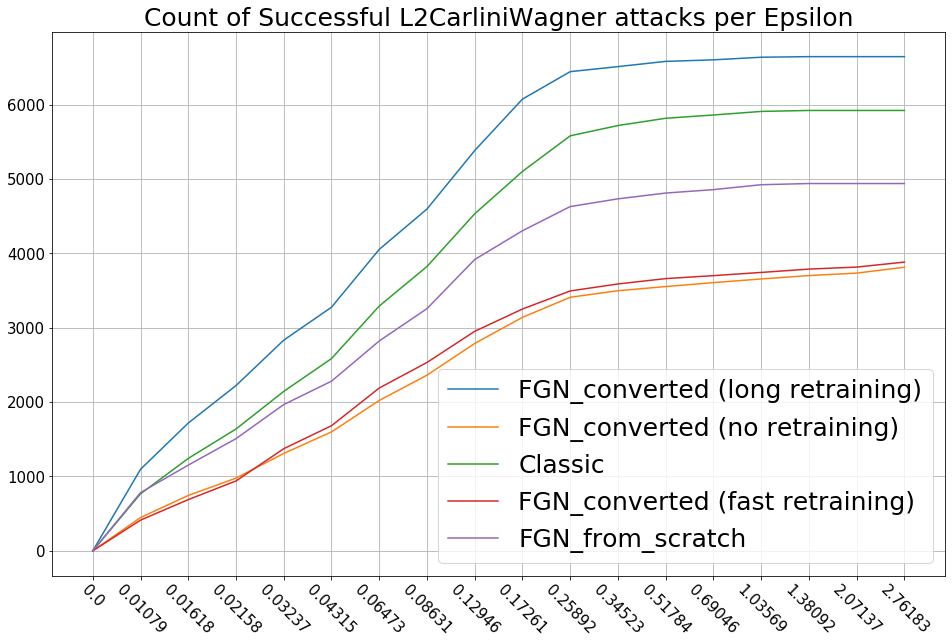

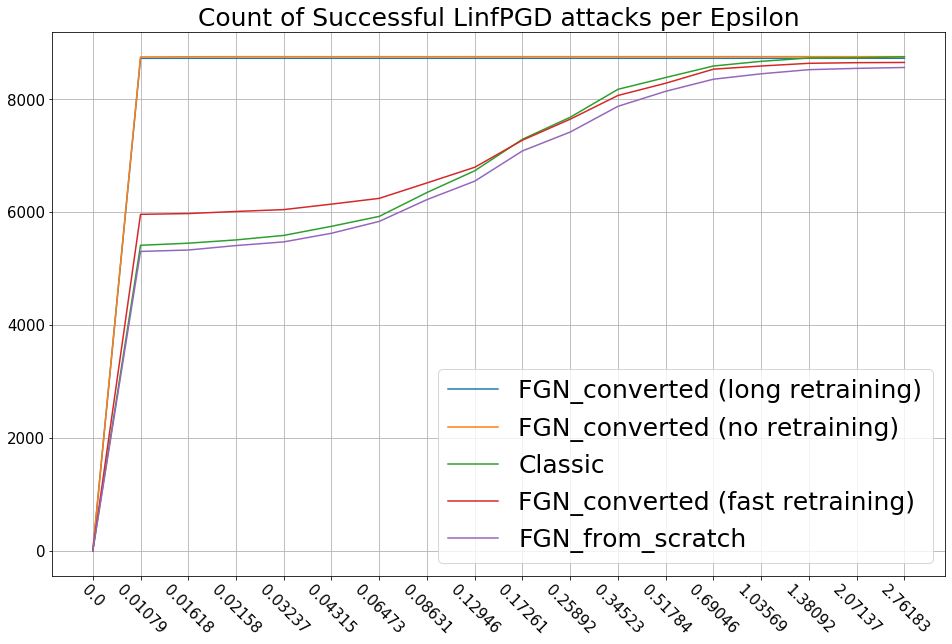

In [25]:
for attack_name in attack_names:
    for model_name in model_names:
        plt.plot(large_eps_conf_wrongs[attack_name][model_name], label='{}'.format(model_name))

    plt.legend(fontsize=25)
    plt.grid()
    plt.title('Count of Successful {} attacks per Epsilon'.format(attack_name), fontsize=25)
    plt.xticks(range(len(large_epsilons)), labels=np.round(large_epsilons,5), rotation=-45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

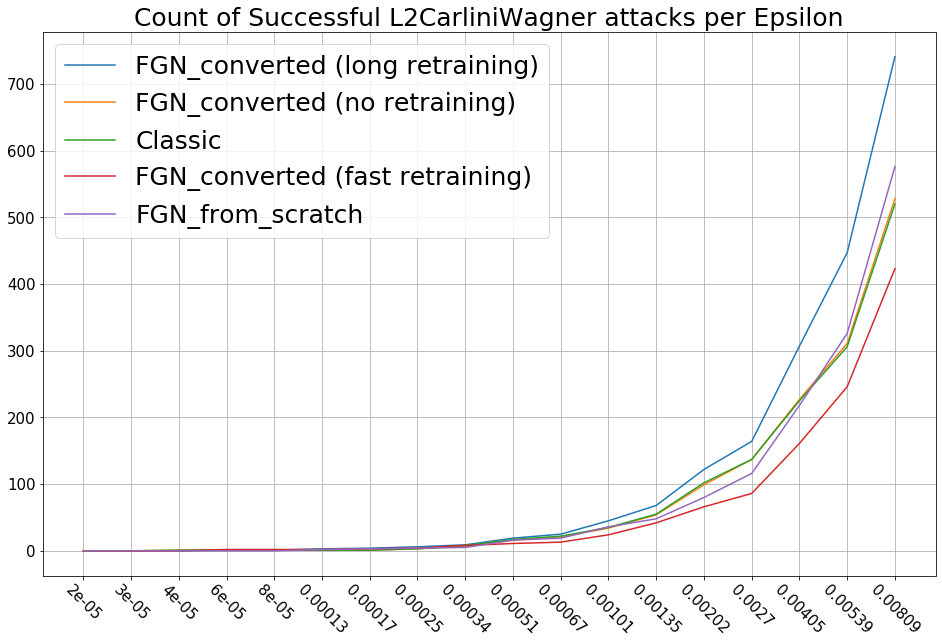

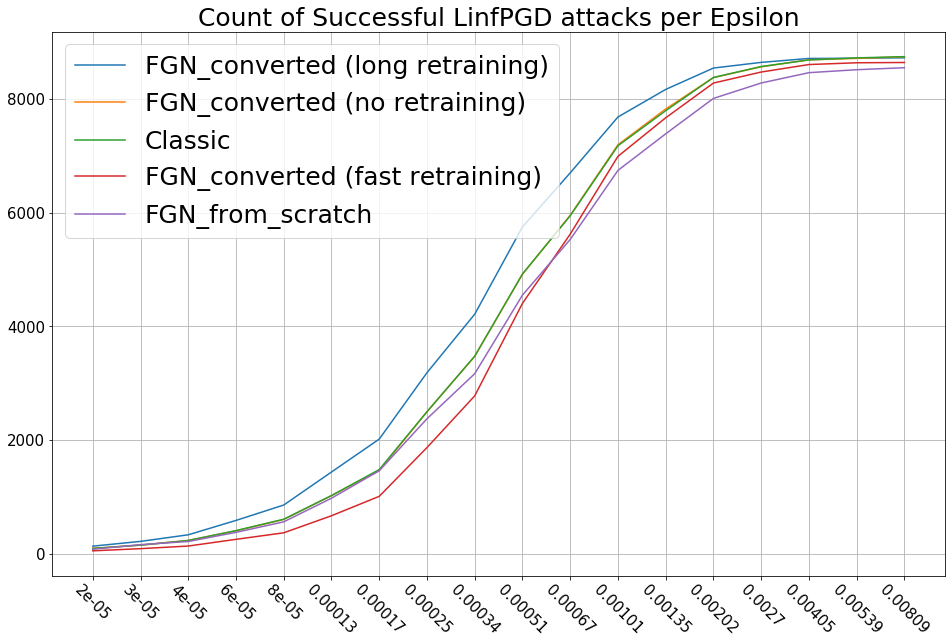

In [55]:
for attack_name in attack_names:
    for model_name in model_names:
        plt.plot(small_eps_conf_wrongs[attack_name][model_name], label='{}'.format(model_name))

    plt.legend(fontsize=25)
    plt.grid()
    plt.title('Count of Successful {} attacks per Epsilon'.format(attack_name), fontsize=25)
#     plt.xticks(range(len(large_epsilons)), labels=['{:.2e}'.format(eps) for eps in small_epsilons], rotation=-45, fontsize=15)
    plt.xticks(range(len(small_epsilons)), labels=np.round(small_epsilons,5), rotation=-45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [21]:
# combined together
epsilons = sorted(large_epsilons+small_epsilons)
conf_wrong = {a:{m:[] for m in model_names} for a in attack_names}

for attack_name in attack_names:
    for model_name in model_names:
        conf_wrong[attack_name][model_name].append(large_eps_conf_wrongs[attack_name][model_name][0])
        conf_wrong[attack_name][model_name]+=small_eps_conf_wrongs[attack_name][model_name]
        conf_wrong[attack_name][model_name]+=large_eps_conf_wrongs[attack_name][model_name][1:]
        
                                        

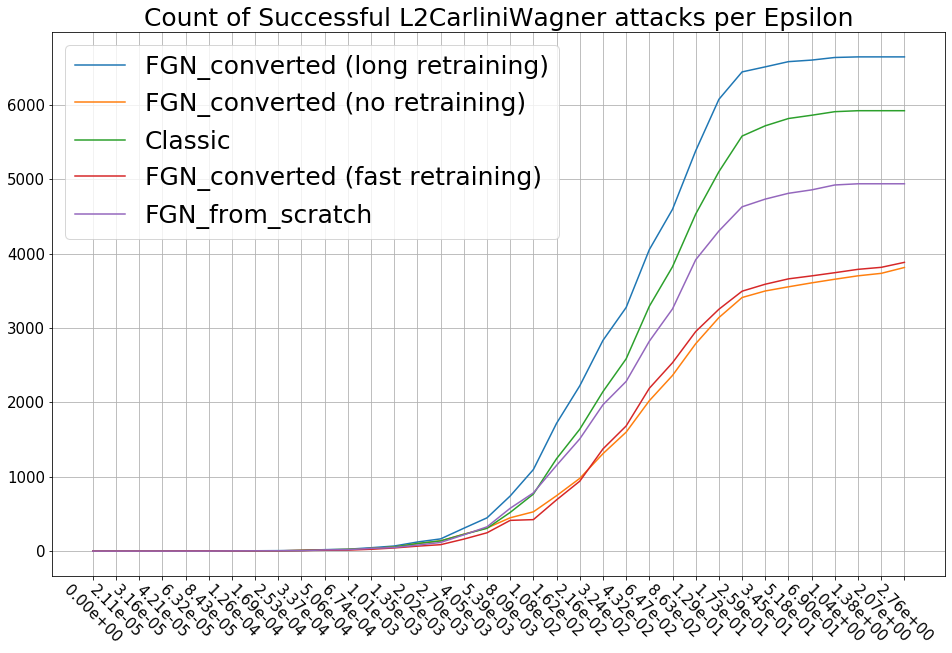

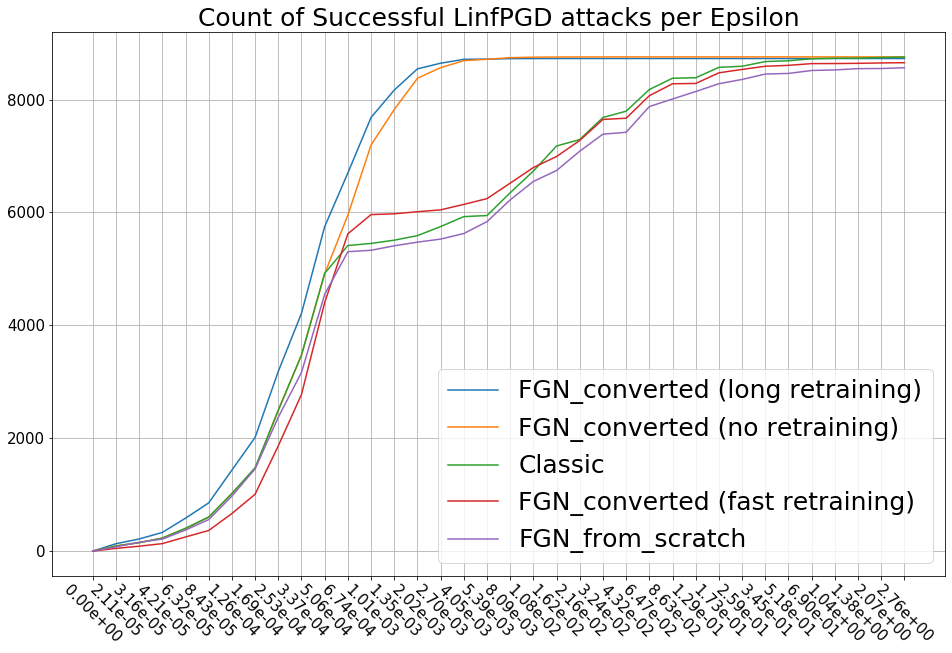

In [76]:
for attack_name in attack_names:
    for model_name in model_names:
        plt.plot(sorted(conf_wrong[attack_name][model_name]), label='{}'.format(model_name))

    plt.legend(fontsize=25)
    plt.grid()
    plt.title('Count of Successful {} attacks per Epsilon'.format(attack_name), fontsize=25)
    plt.xticks(range(len(epsilons)), labels=['{:.2e}'.format(eps) for eps in epsilons], rotation=-45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [34]:
[0]+conf_wrong[attack_name][model_name][10:]

[0,
 16,
 19,
 36,
 48,
 80,
 116,
 218,
 326,
 576,
 783,
 1153,
 1509,
 1968,
 2282,
 2823,
 3258,
 3919,
 4306,
 4631,
 4735,
 4813,
 4859,
 4925,
 4941,
 4941,
 4941]

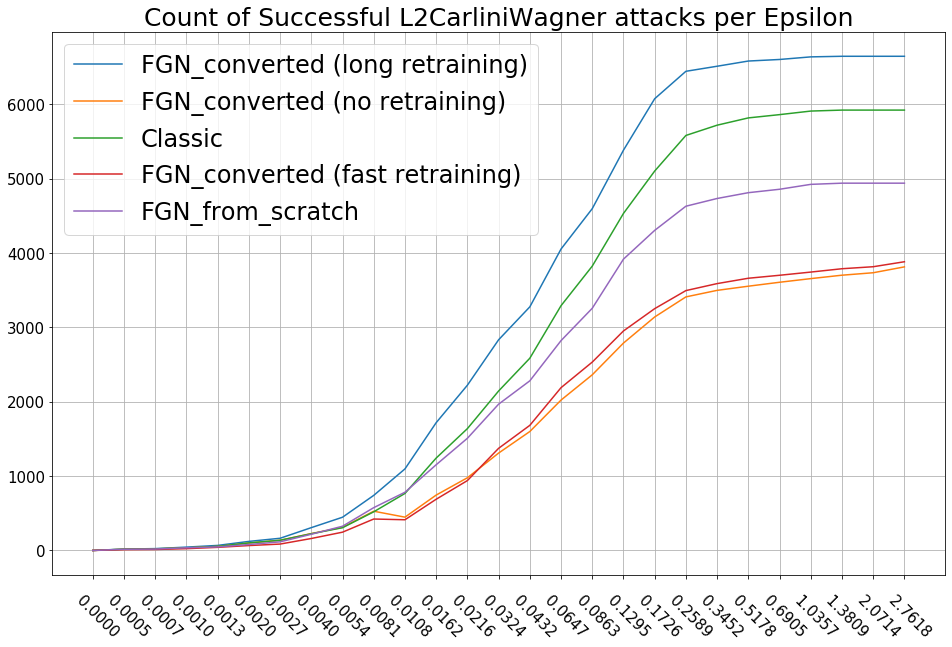

In [73]:
# attack specific plots
# cw - full epsilons
attack_name = 'L2CarliniWagner'
for model_name in model_names:
    plt.plot([0]+conf_wrong[attack_name][model_name][10:], label='{}'.format(model_name))

plt.legend(fontsize=24,loc='best')
plt.grid()
plt.title('Count of Successful {} attacks per Epsilon'.format(attack_name), fontsize=25)
# plt.xticks(range(len(epsilons[10:])), labels=['{:.2e}'.format(eps) for eps in epsilons[10:]], rotation=-45, fontsize=15)
plt.xticks(range(len([0]+epsilons[10:])), labels=['   {:.4f}'.format(eps) for eps in [0]+epsilons[10:]], rotation=-45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

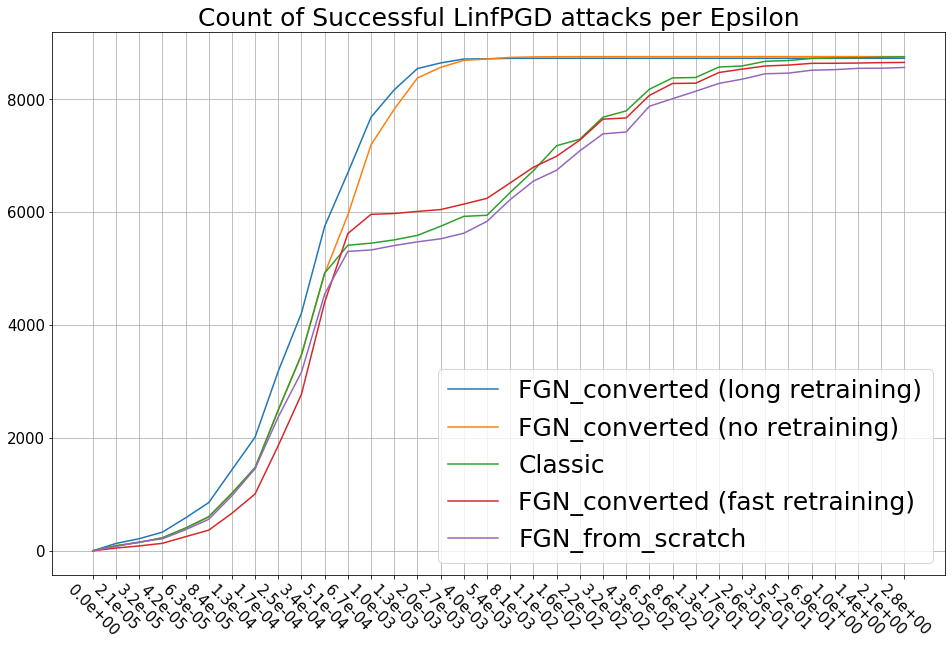

In [49]:
# LinfPGD
attack_name='LinfPGD'
for model_name in model_names:
    plt.plot(sorted(conf_wrong[attack_name][model_name]), label='{}'.format(model_name))

plt.legend(fontsize=25)
plt.grid()
plt.title('Count of Successful {} attacks per Epsilon'.format(attack_name), fontsize=25)
plt.xticks(range(len(epsilons)), labels=['{:.1e}'.format(eps) for eps in epsilons], rotation=-45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

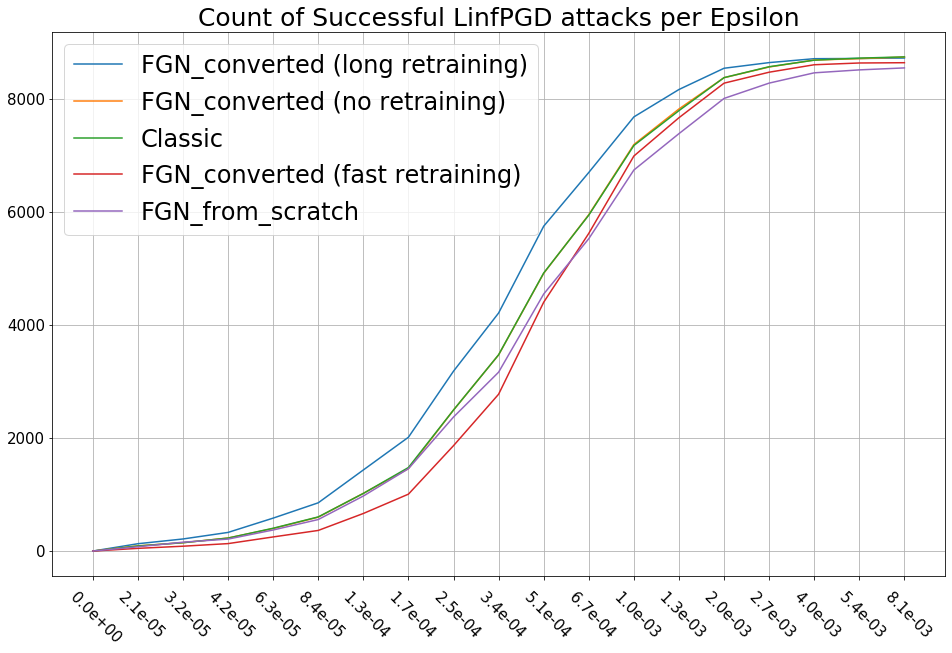

In [72]:
# sorted makes no sense: probably some bug in the large epsilon values
# only plot the small epsilons (they all go to the max anyways)
attack_name='LinfPGD'
for model_name in model_names:
    plt.plot([0]+small_eps_conf_wrongs[attack_name][model_name], label='{}'.format(model_name))

plt.legend(fontsize=24)
plt.grid()
plt.title('Count of Successful {} attacks per Epsilon'.format(attack_name), fontsize=25)
plt.xticks(range(len([0]+small_epsilons)), labels=['  {:.1e}'.format(eps) for eps in [0]+small_epsilons], rotation=-45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

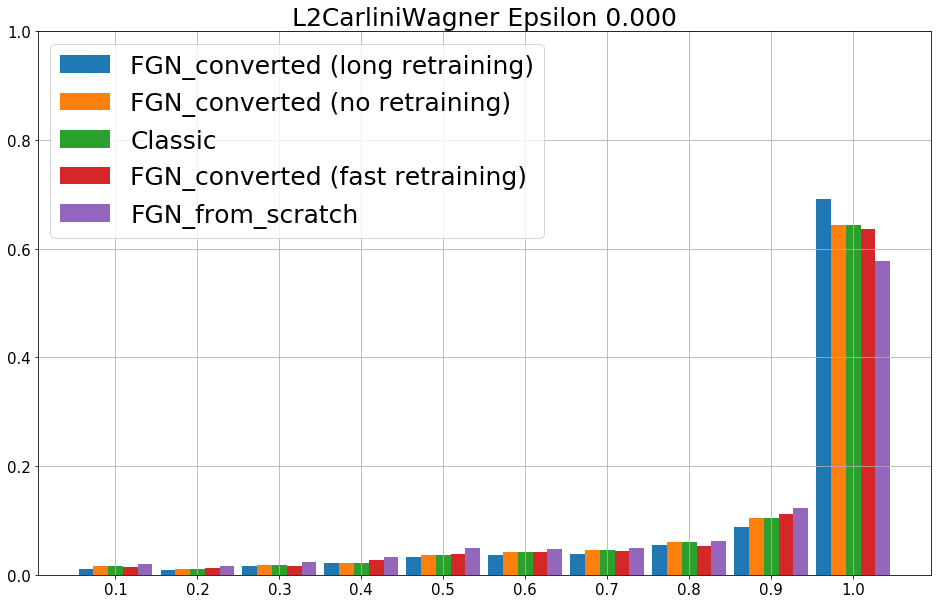

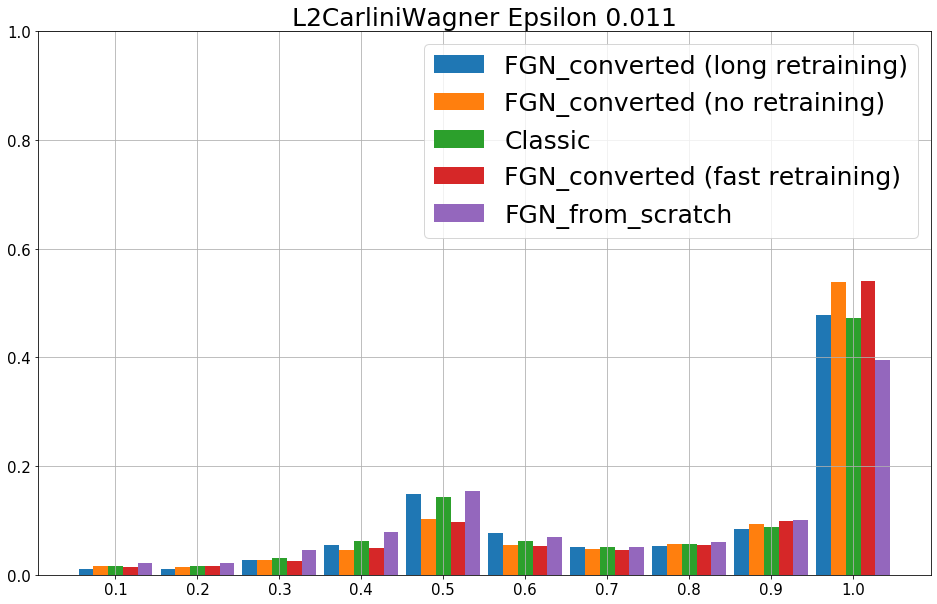

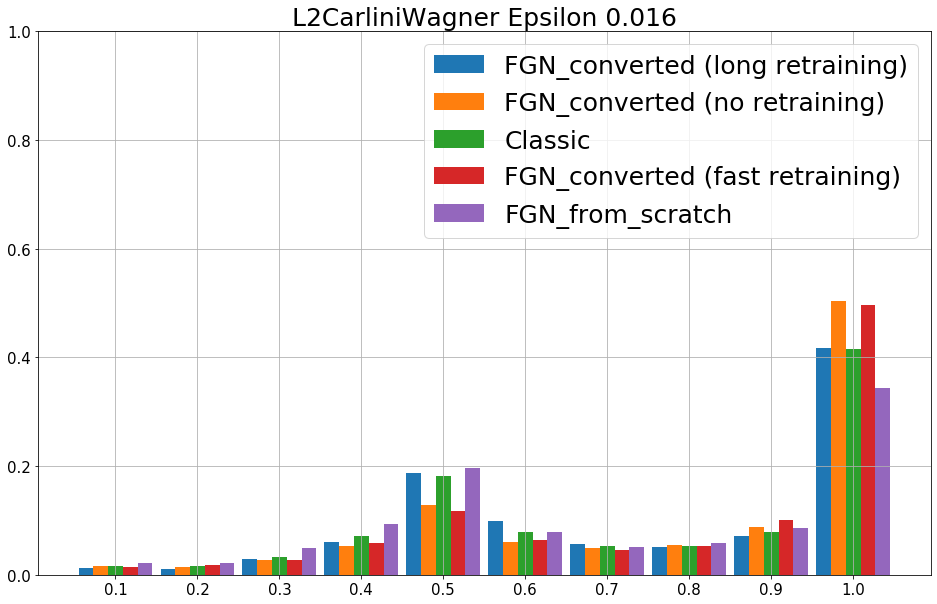

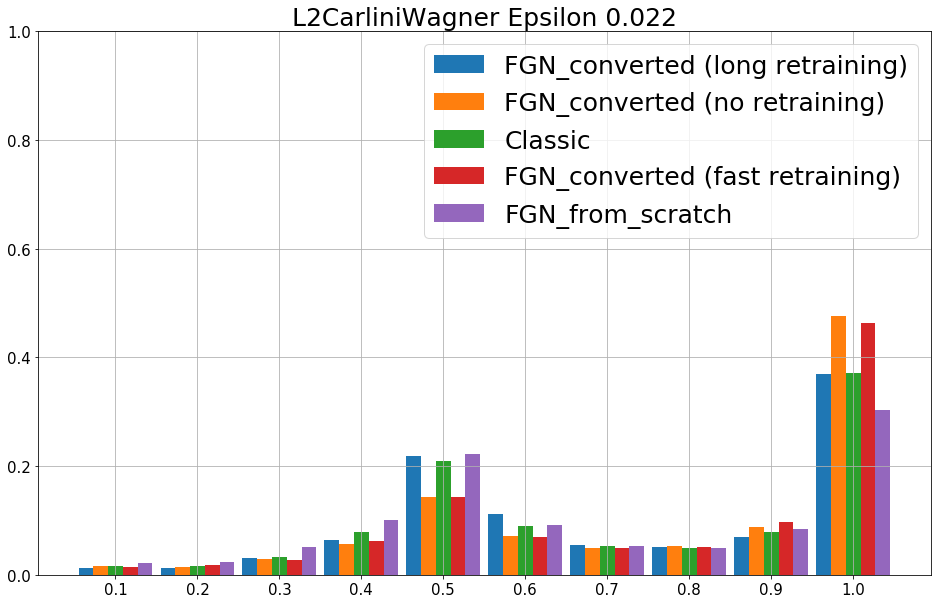

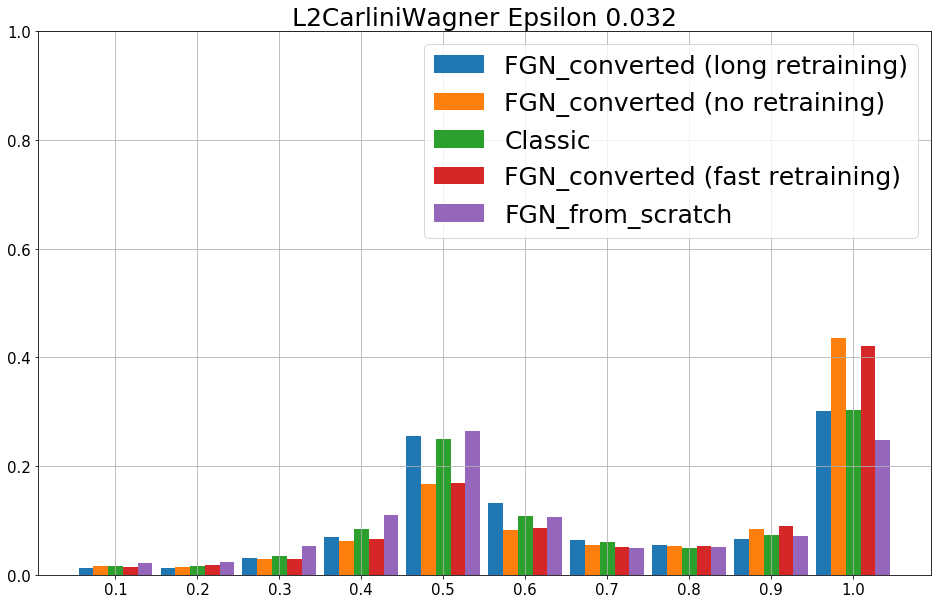

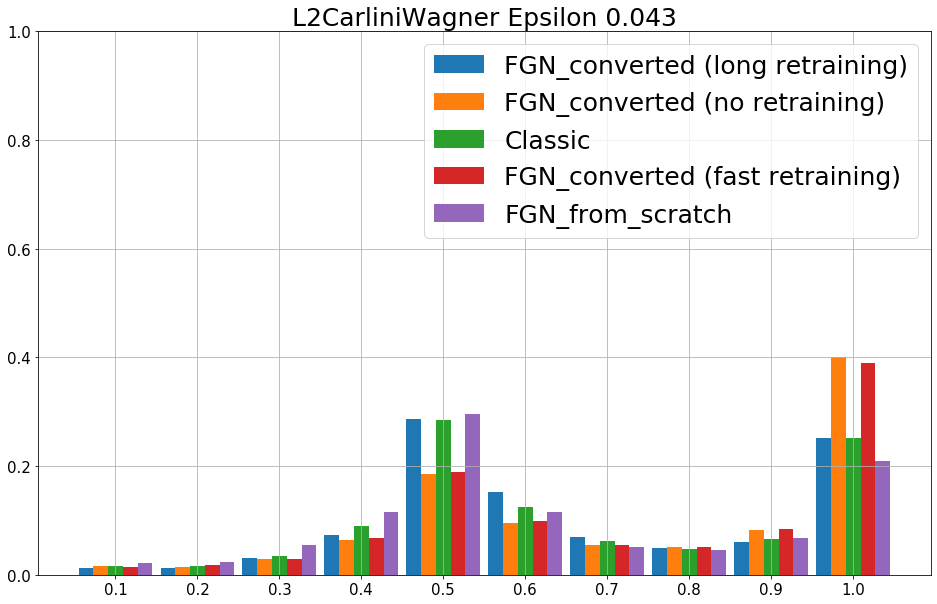

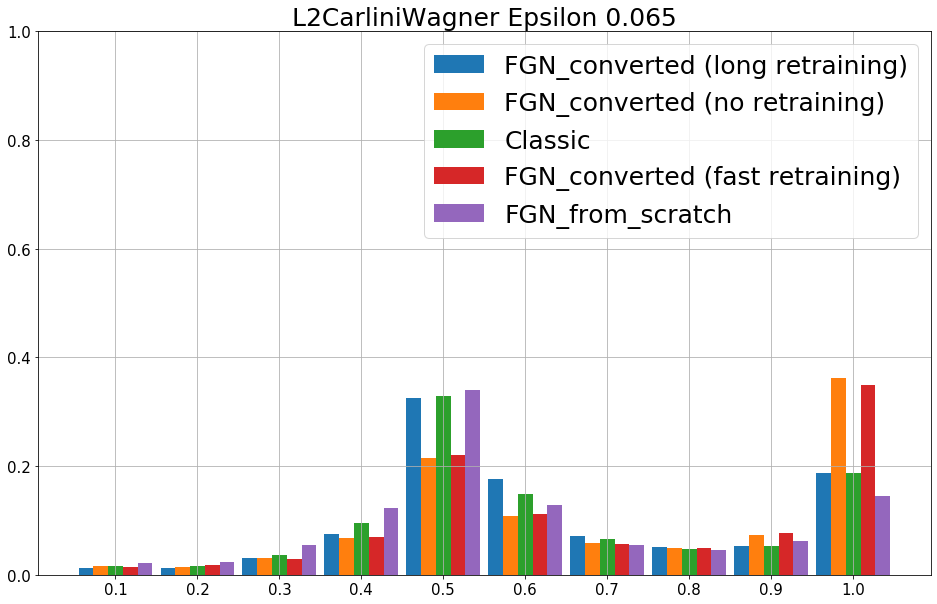

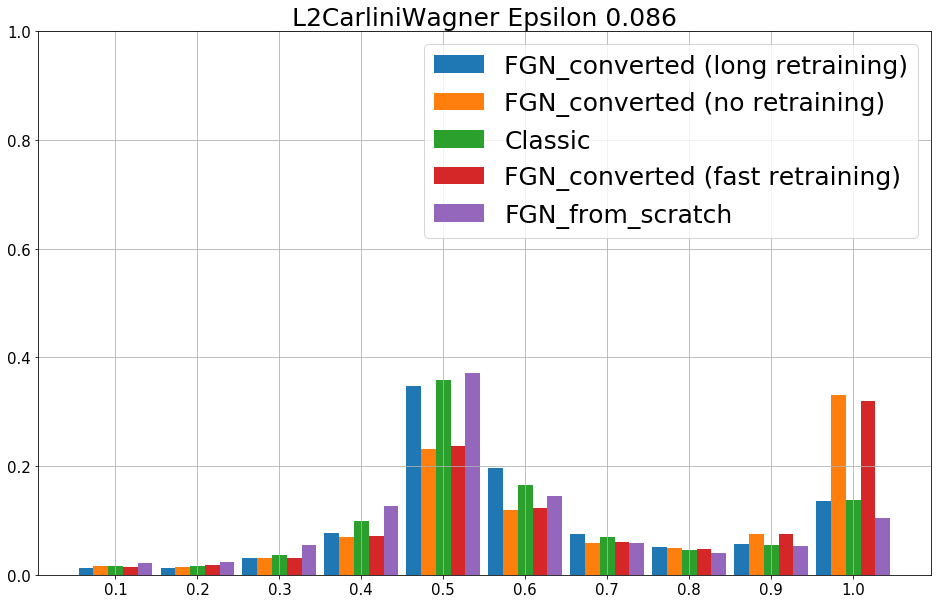

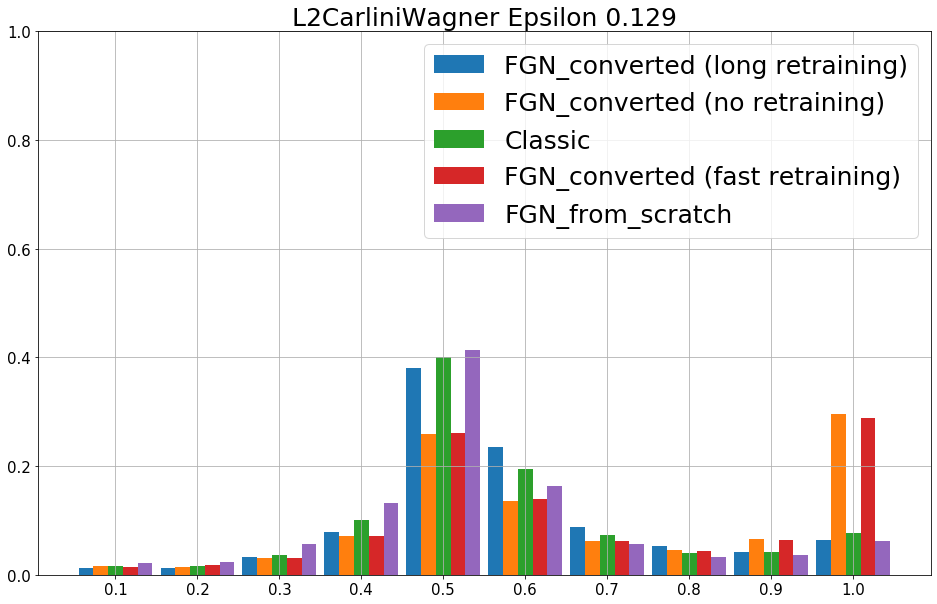

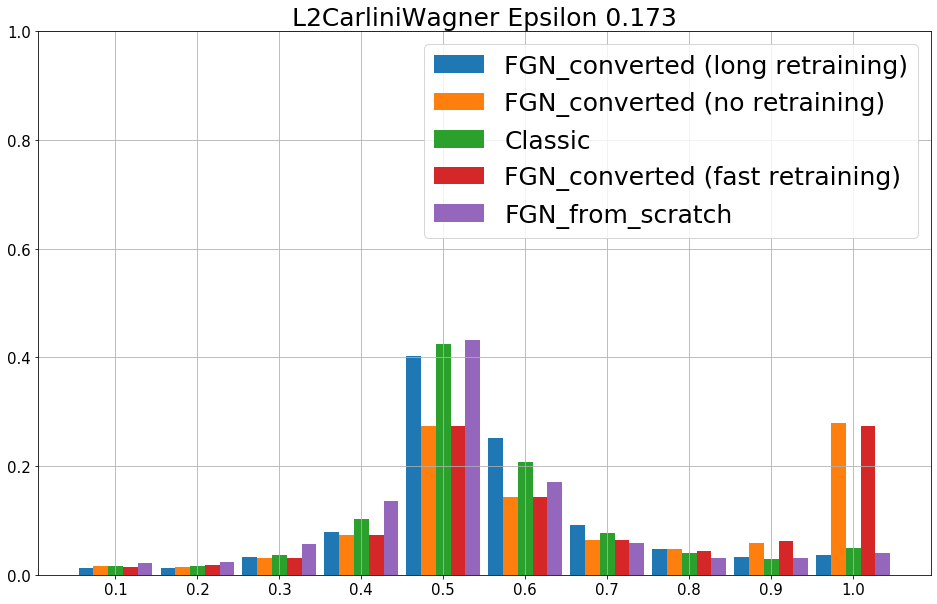

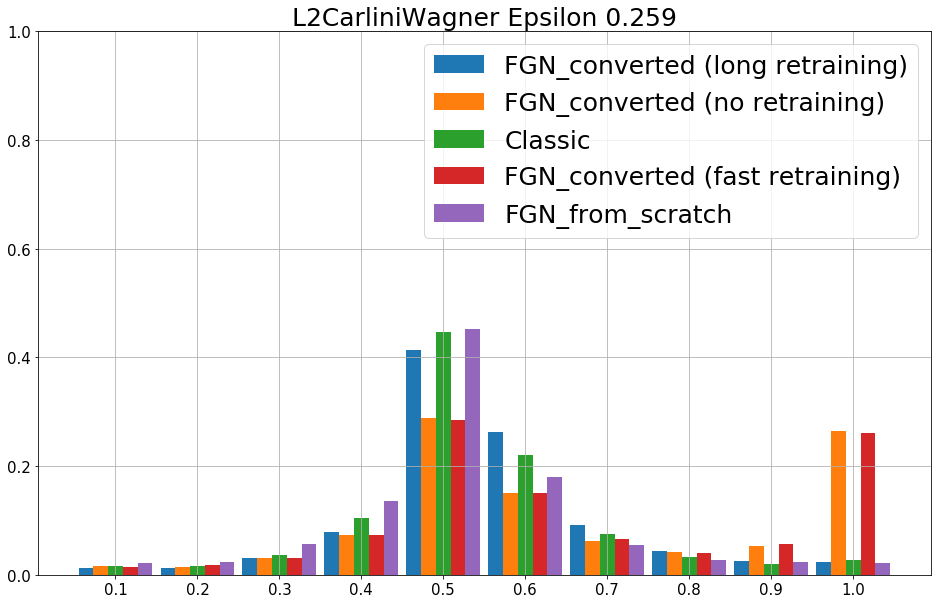

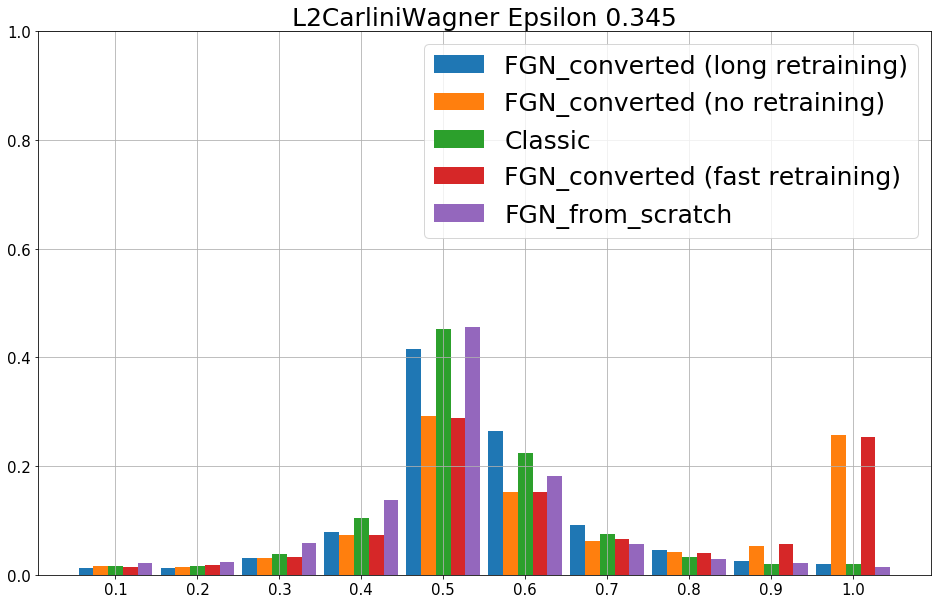

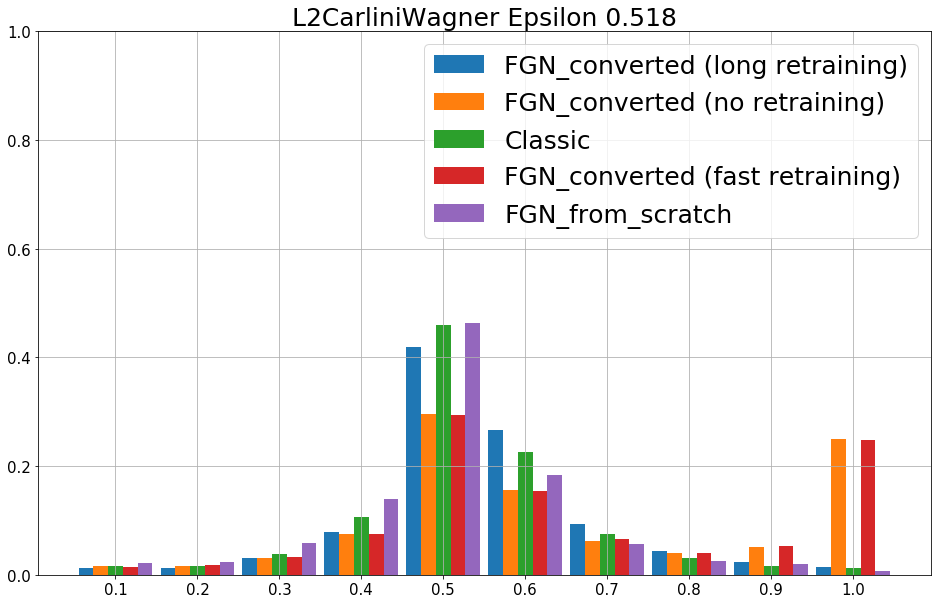

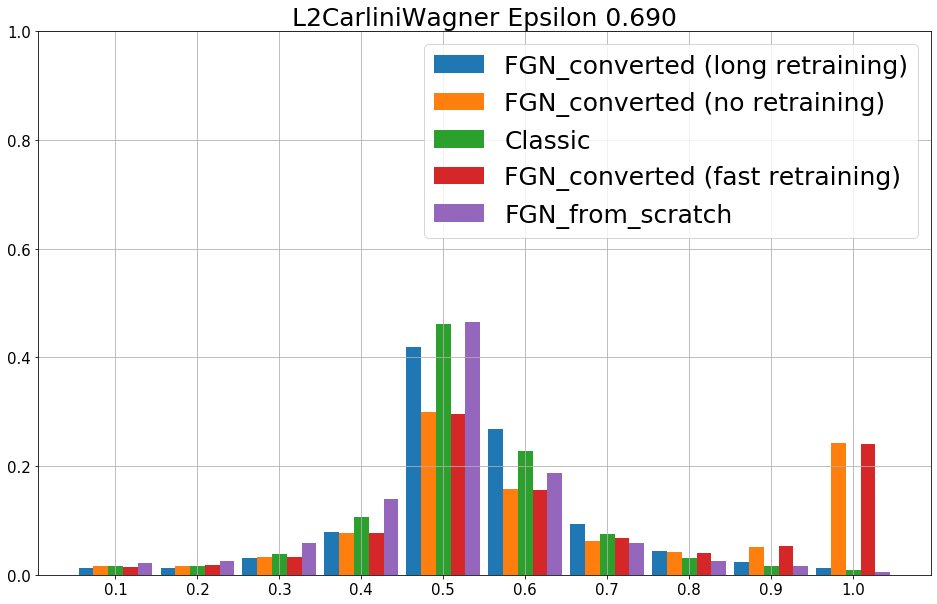

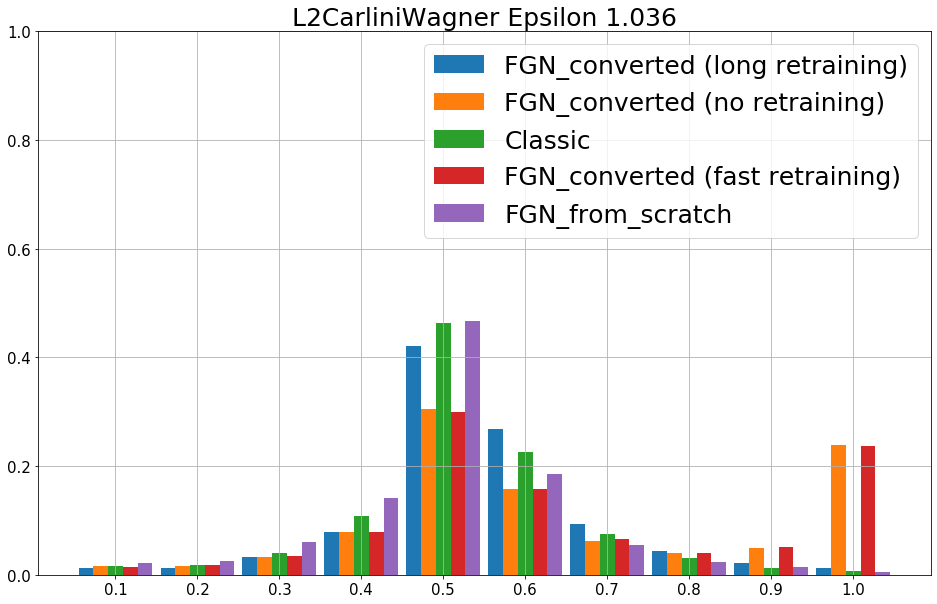

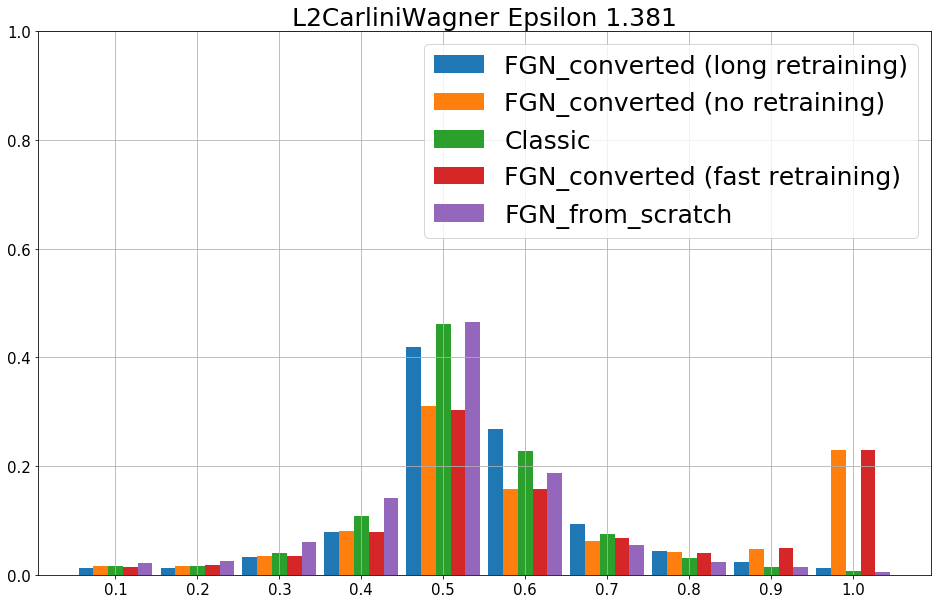

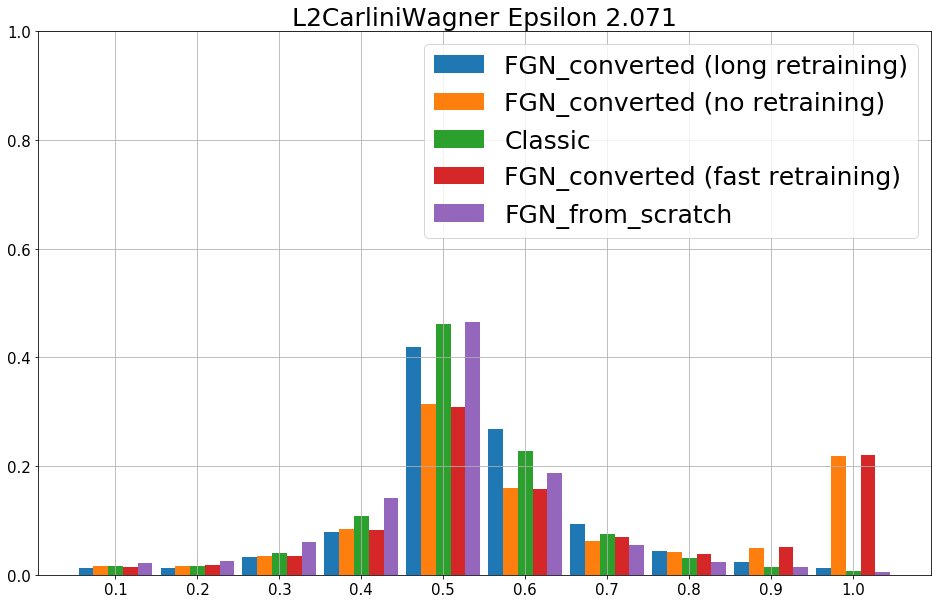

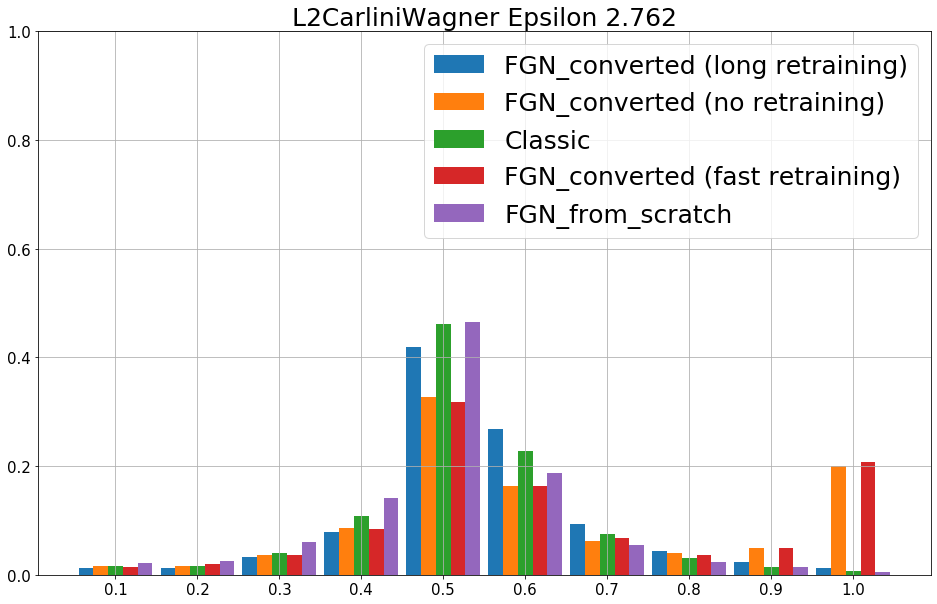

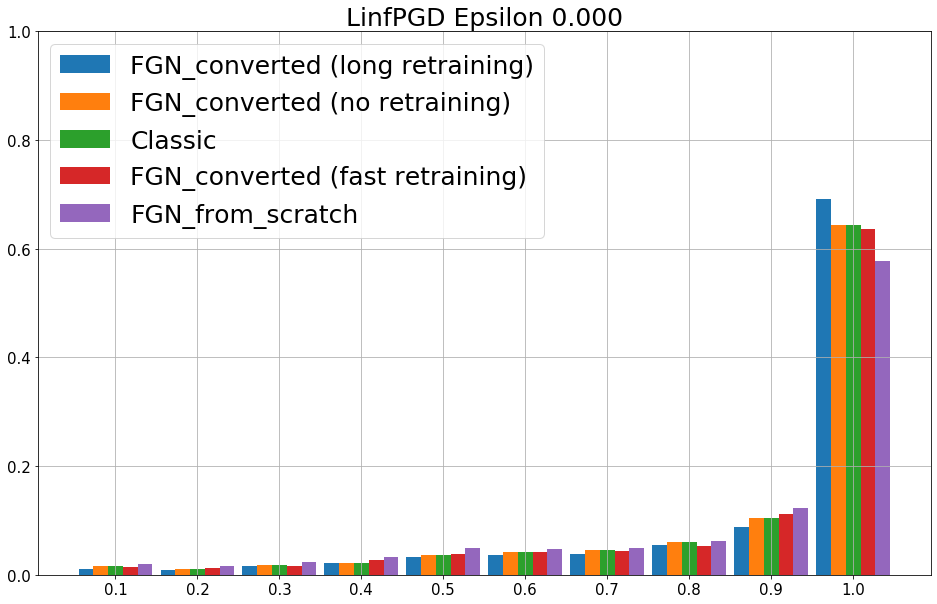

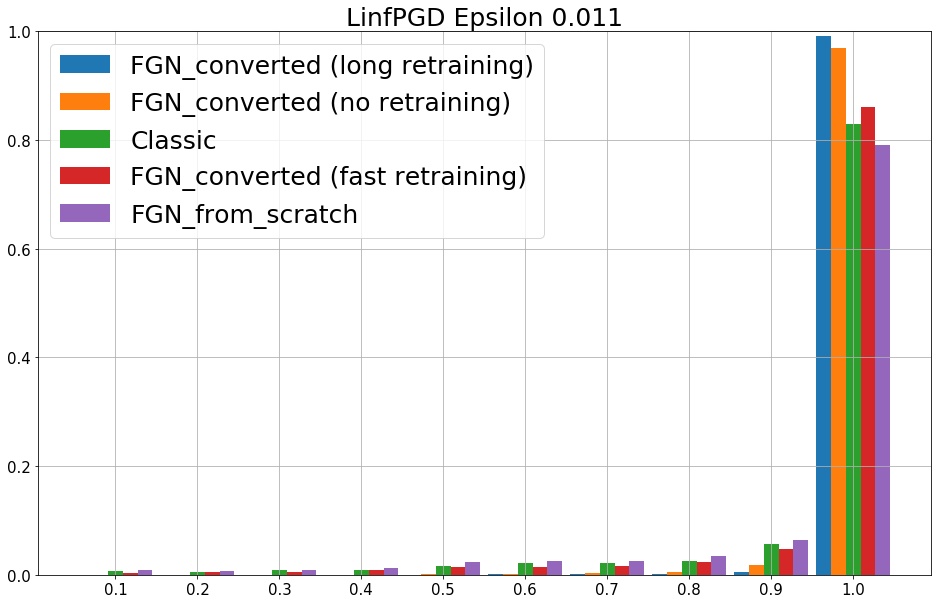

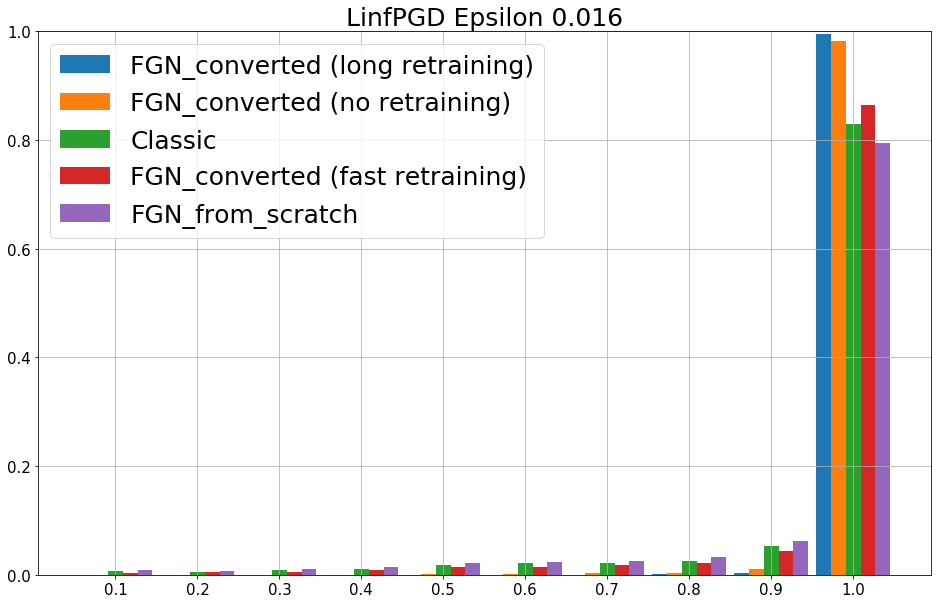

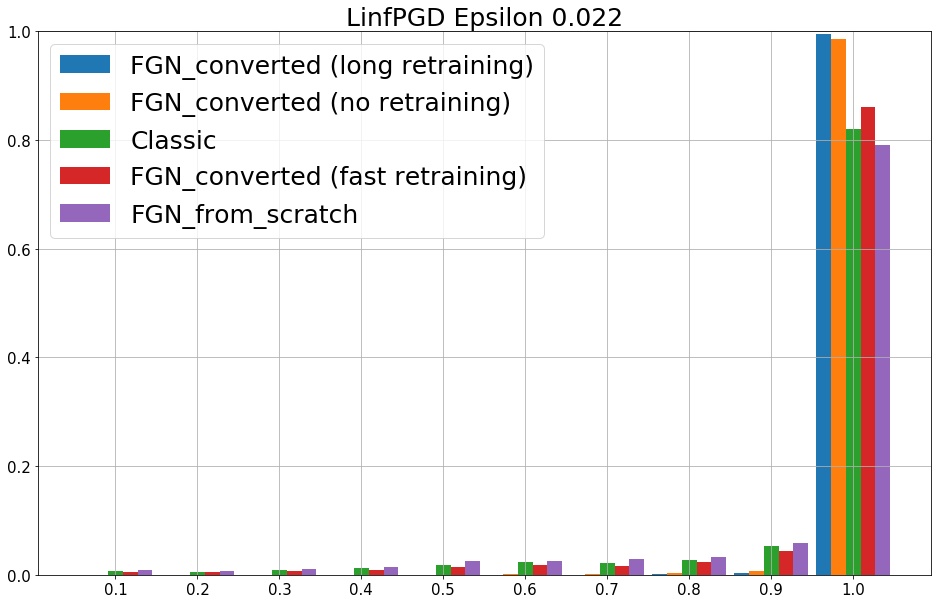

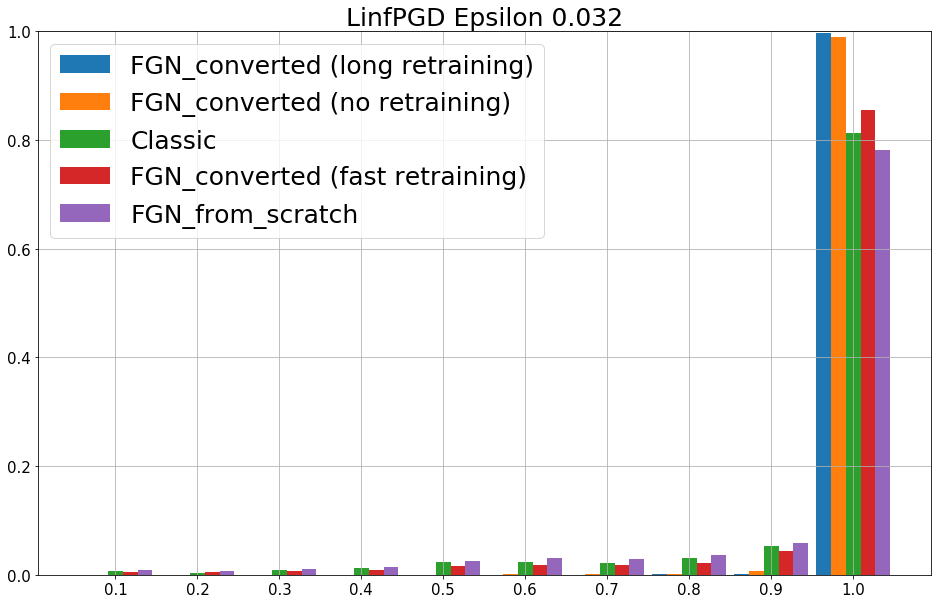

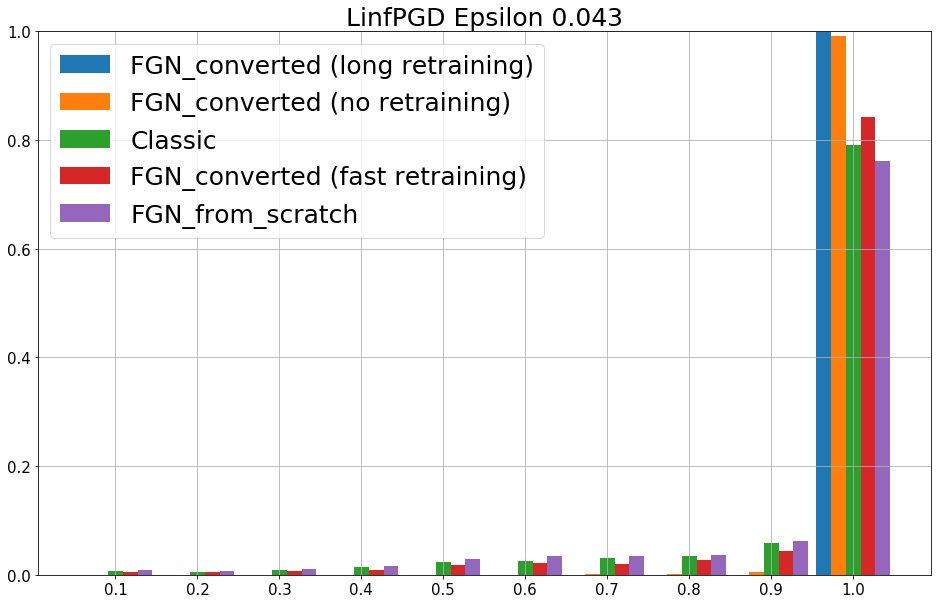

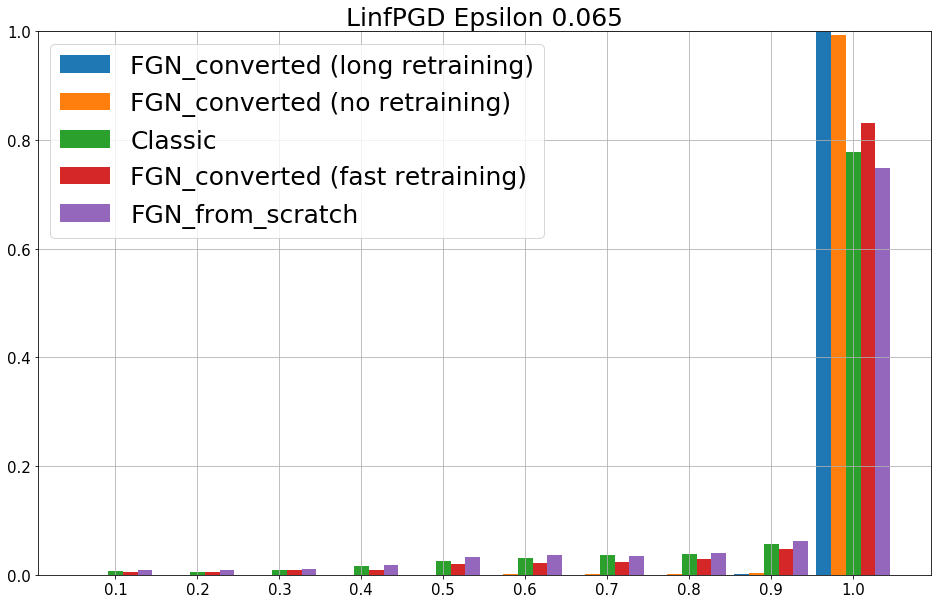

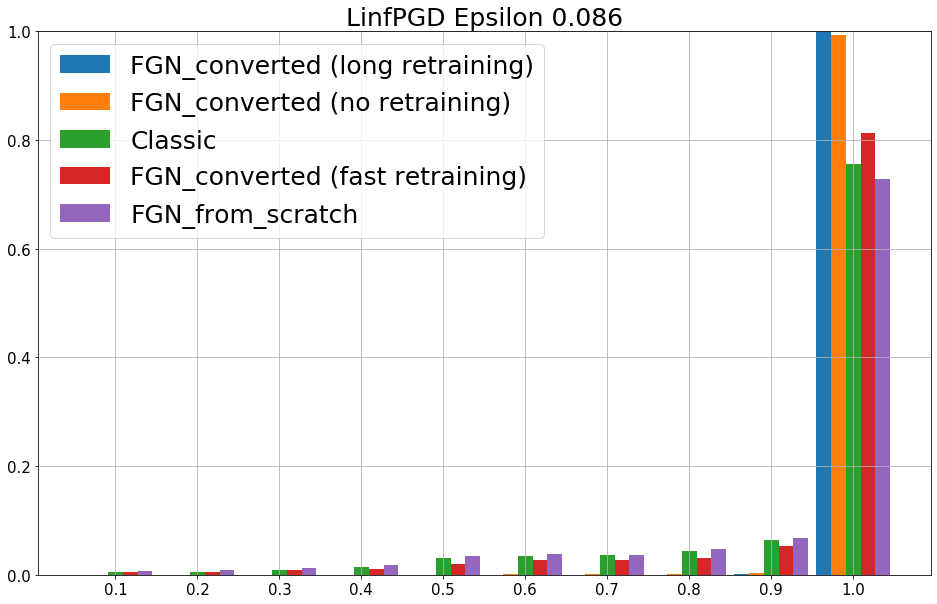

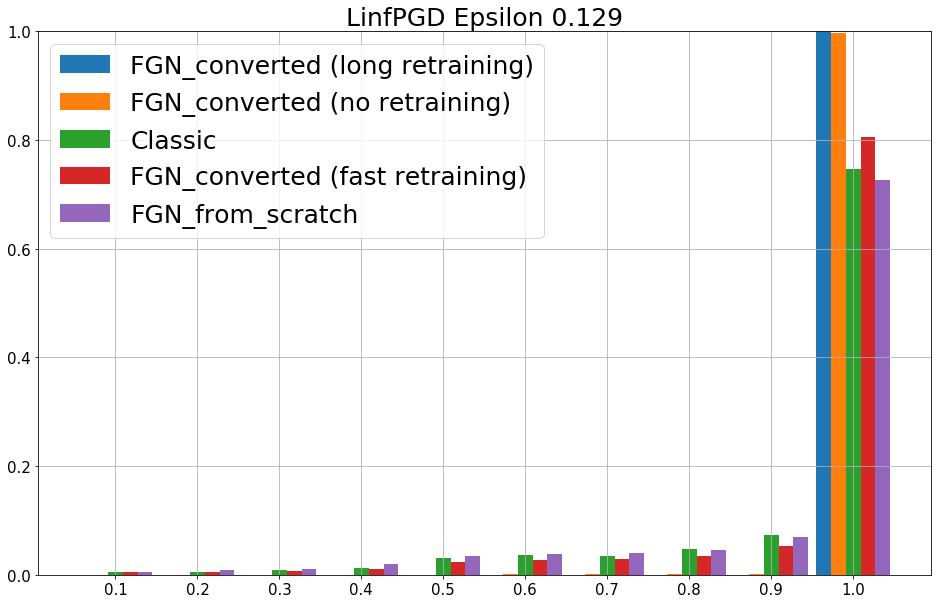

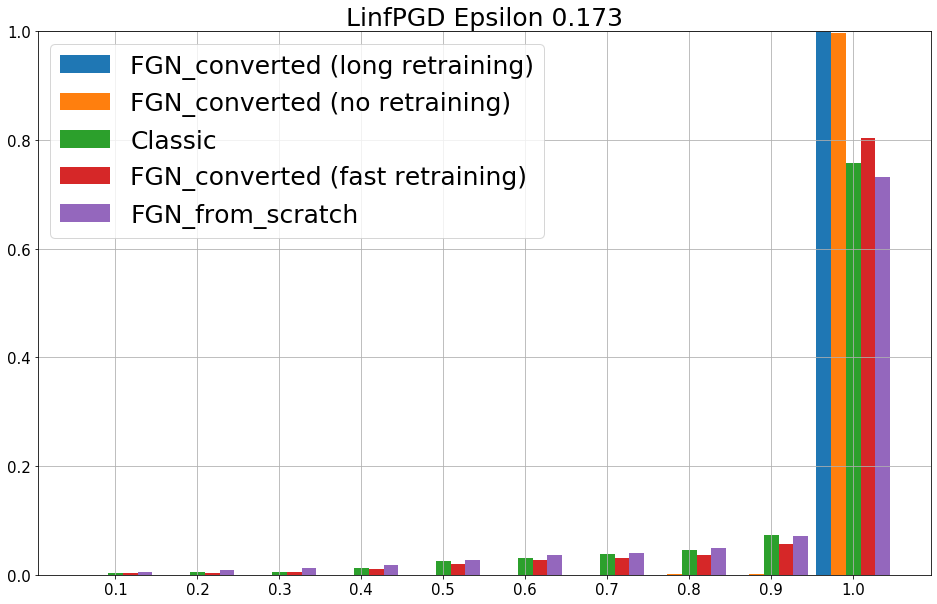

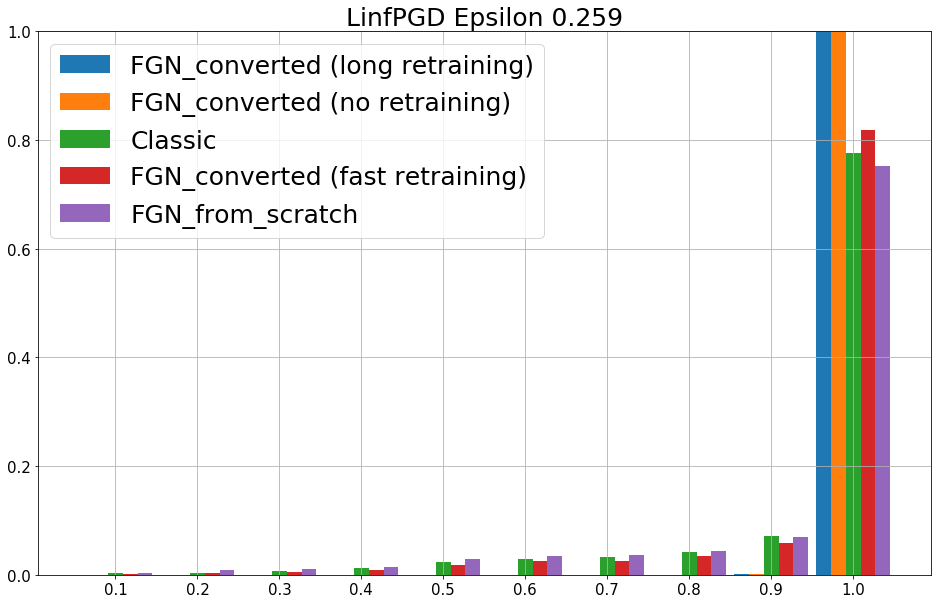

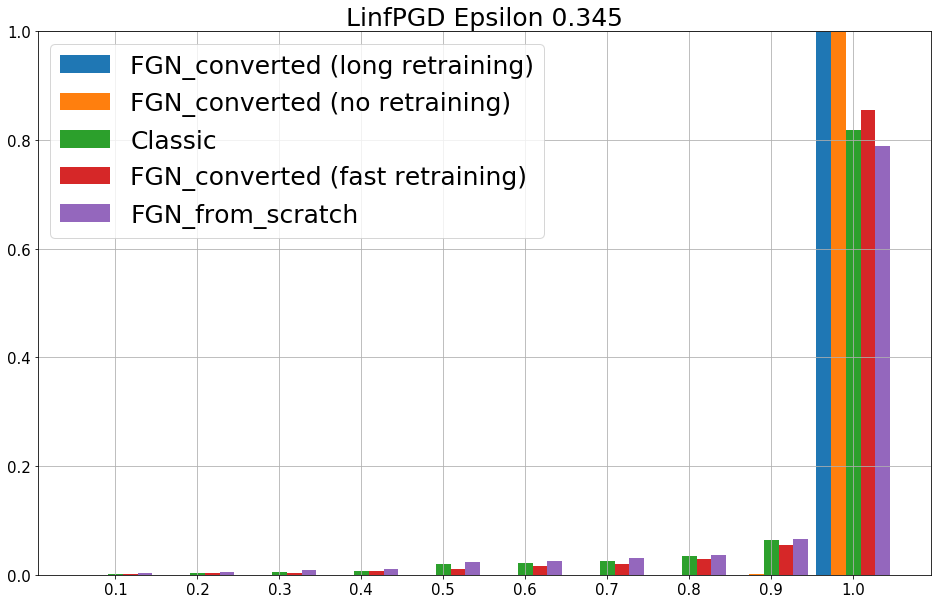

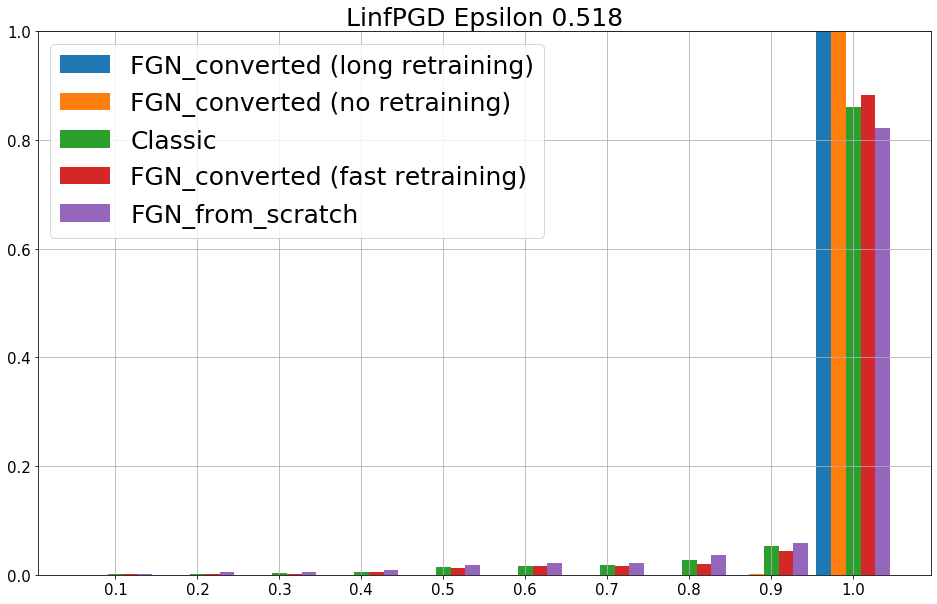

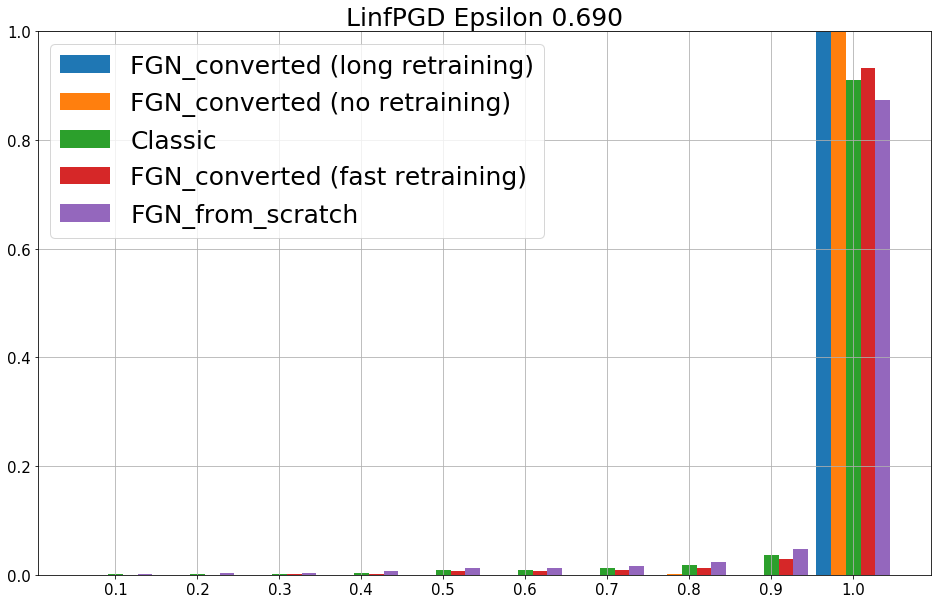

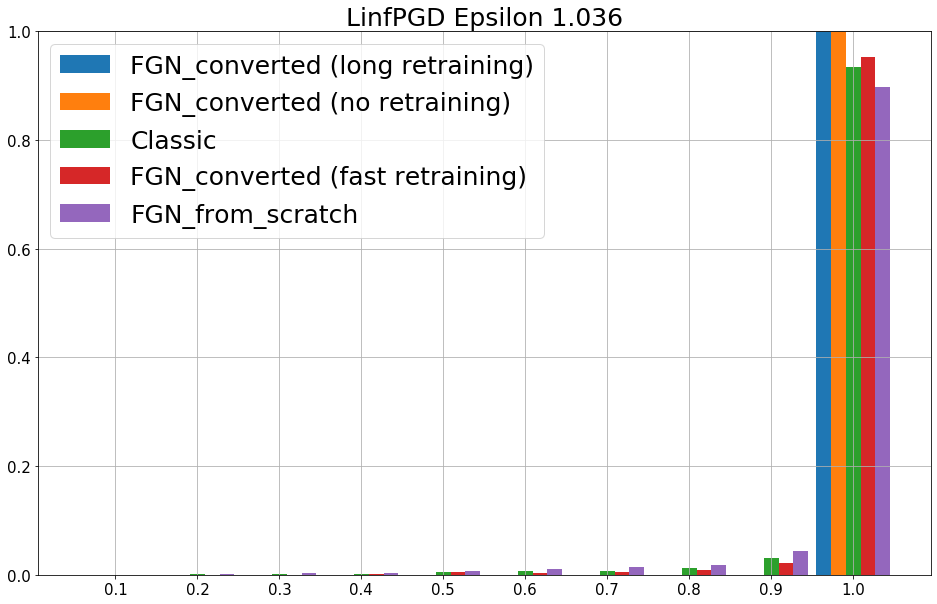

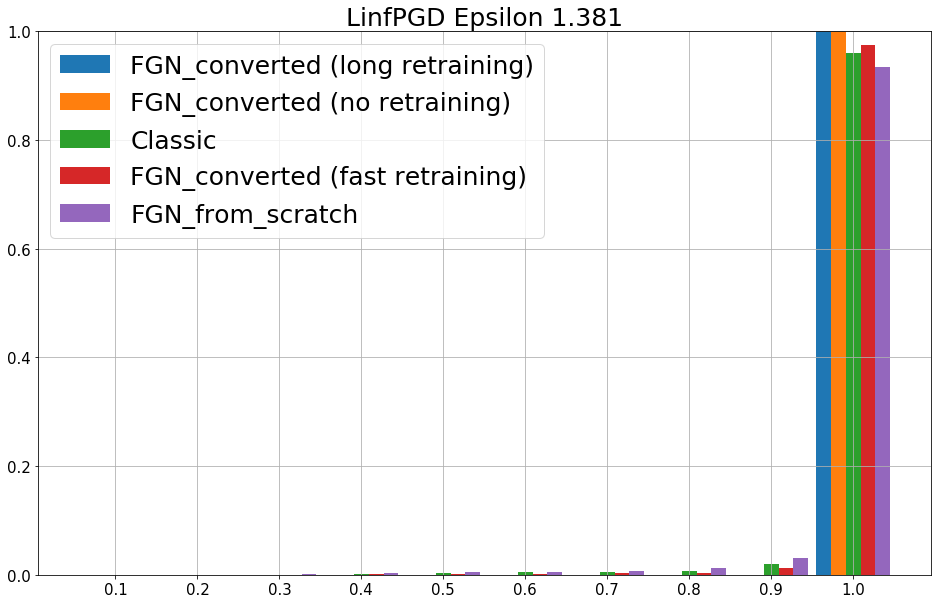

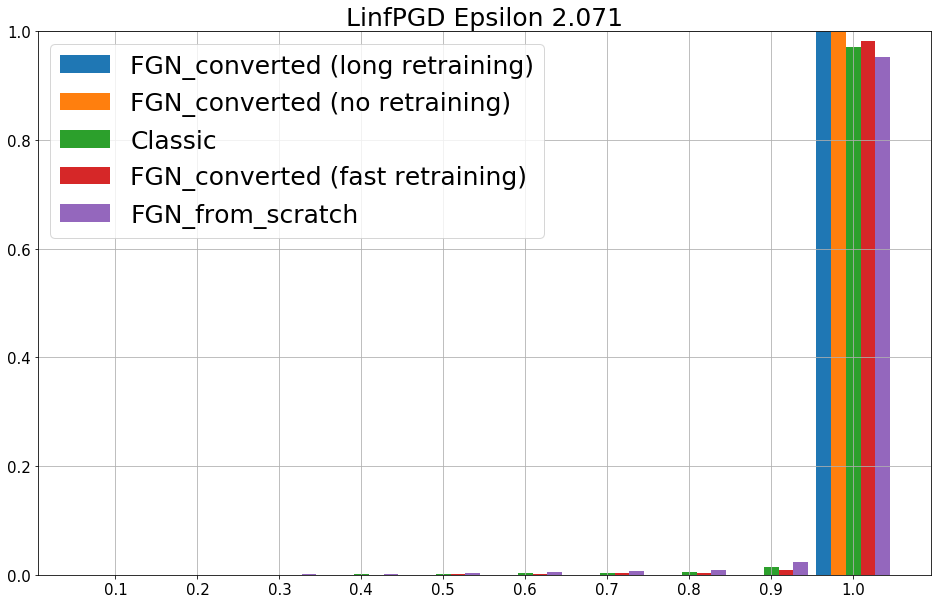

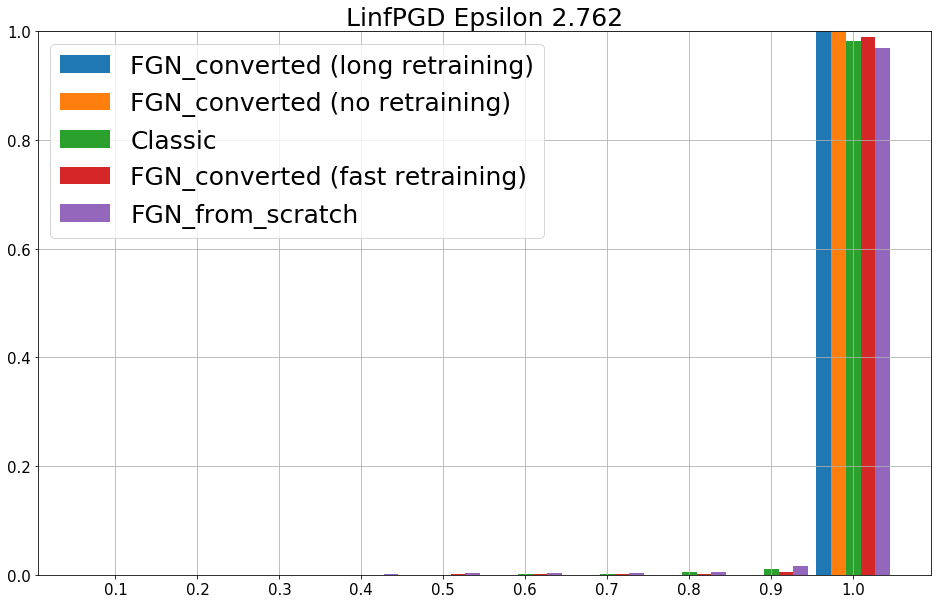

In [74]:
# histogram of conf

for attack_name in attack_names:
    for eps_ind,eps in enumerate(large_epsilons):
        confs = []
        weights = []
        for model_name in model_names:
            confs.append(large_eps_adv_confidences[attack_name][model_name][eps_ind])
            weights.append(np.ones_like(large_eps_adv_confidences[attack_name][model_name][eps_ind])/len(large_eps_adv_confidences[attack_name][model_name][eps_ind]))

        plt.hist(confs,
                 weights = weights,
                 label=model_names,
                 bins= 0.05+ np.arange(11)/10,
                 align='mid',
                 rwidth=0.90
                )

        plt.xticks((np.arange(10)+1)/10.0)
        plt.grid(True)
        plt.legend(fontsize=25)
        plt.title('{} Epsilon {:.3f}'.format(attack_name, eps), fontsize=25)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.ylim(top=1.0)

        plt.show()

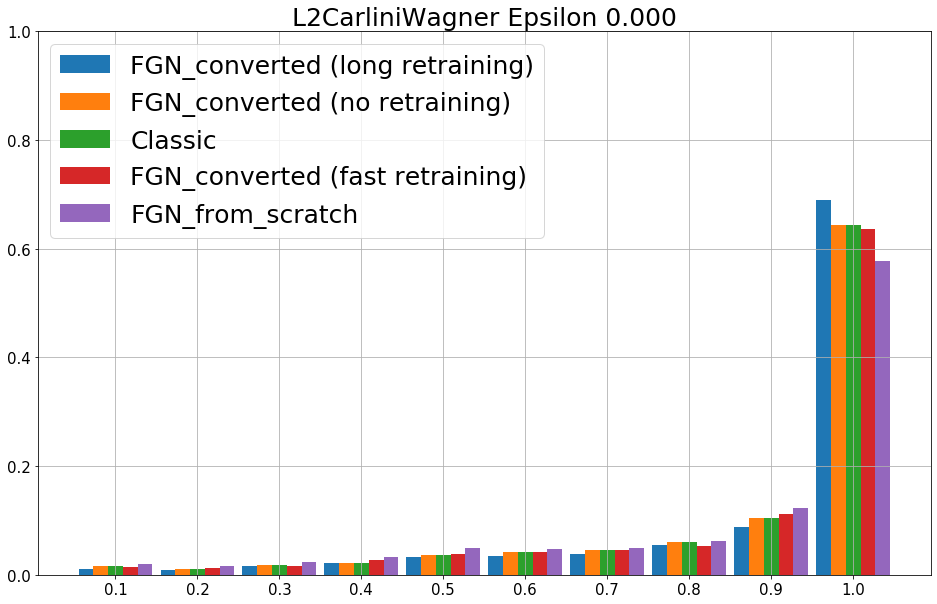

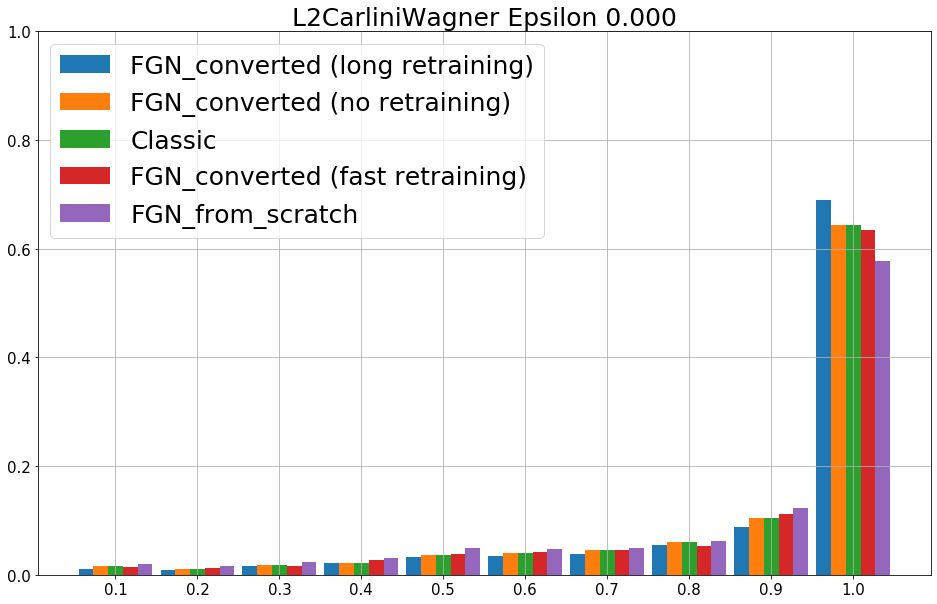

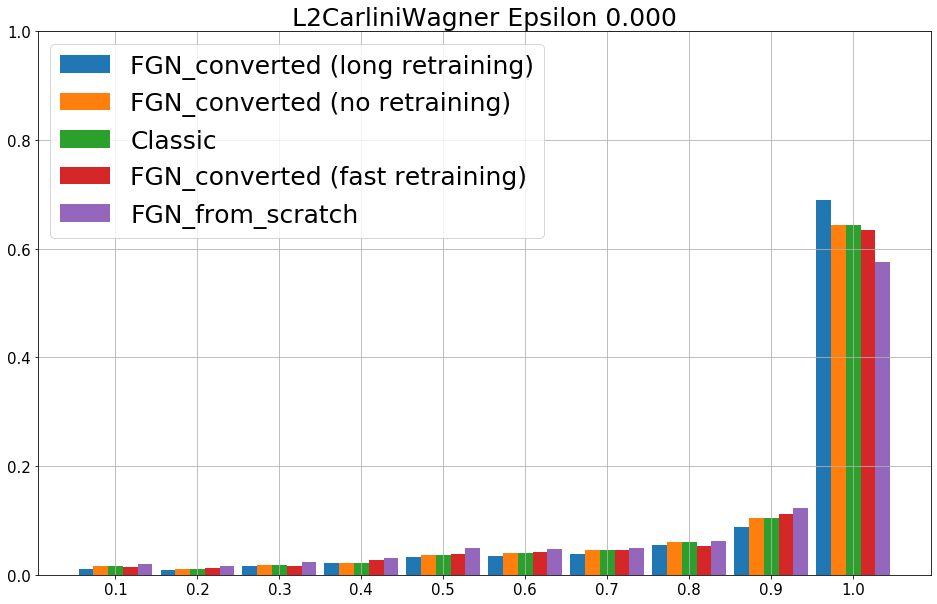

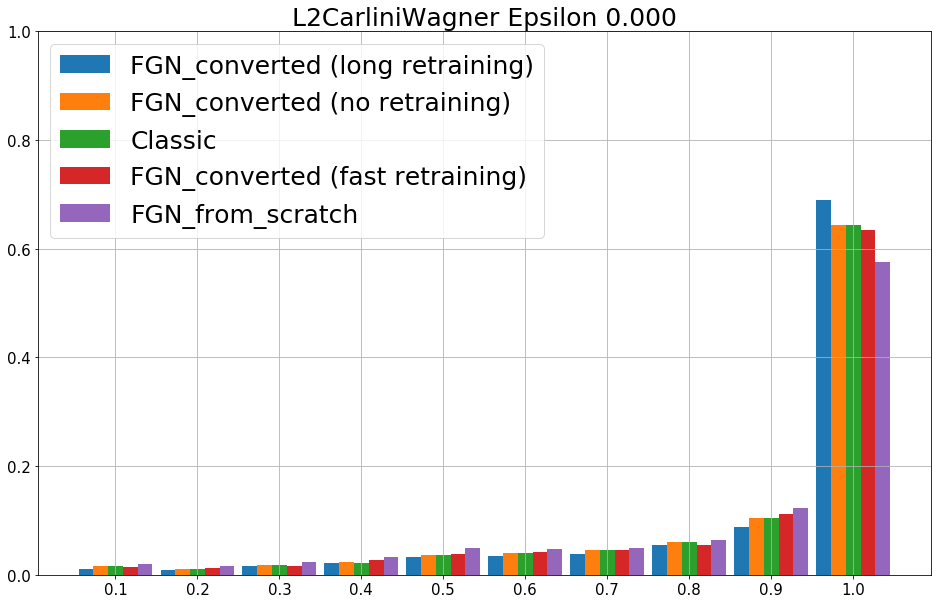

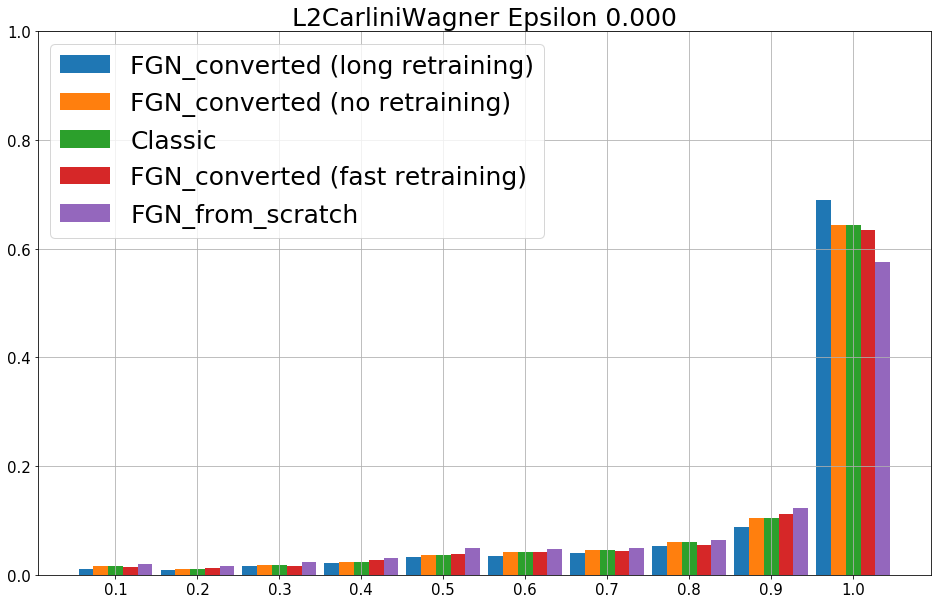

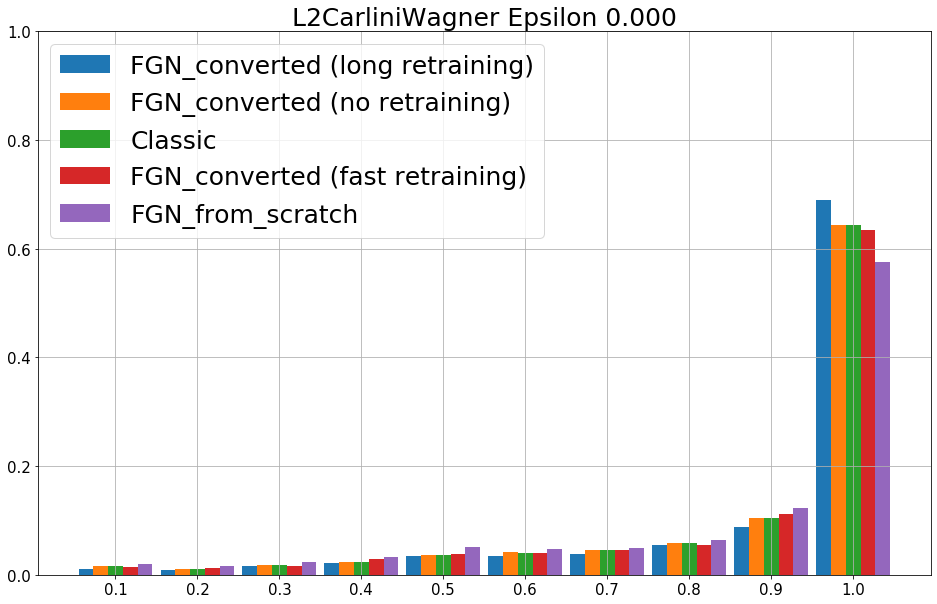

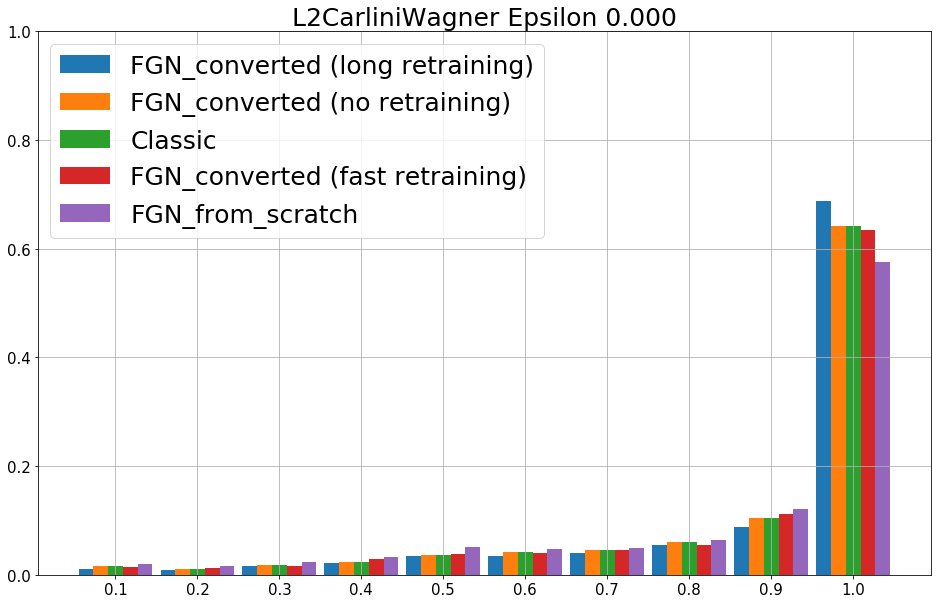

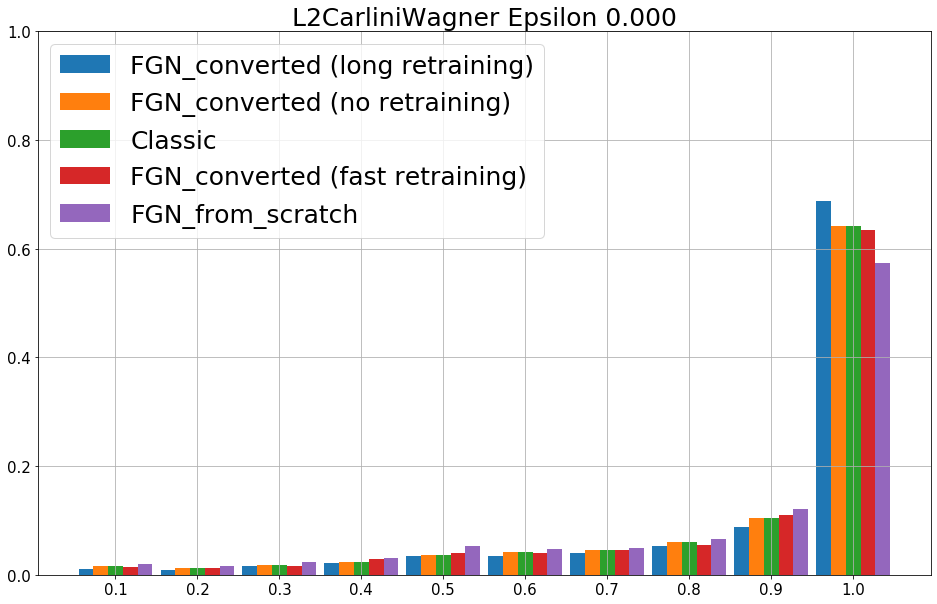

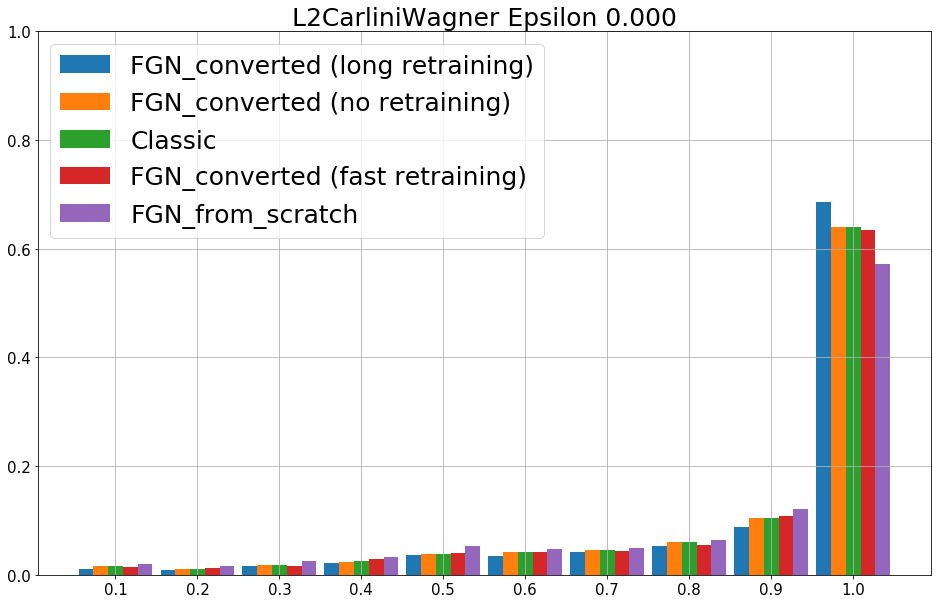

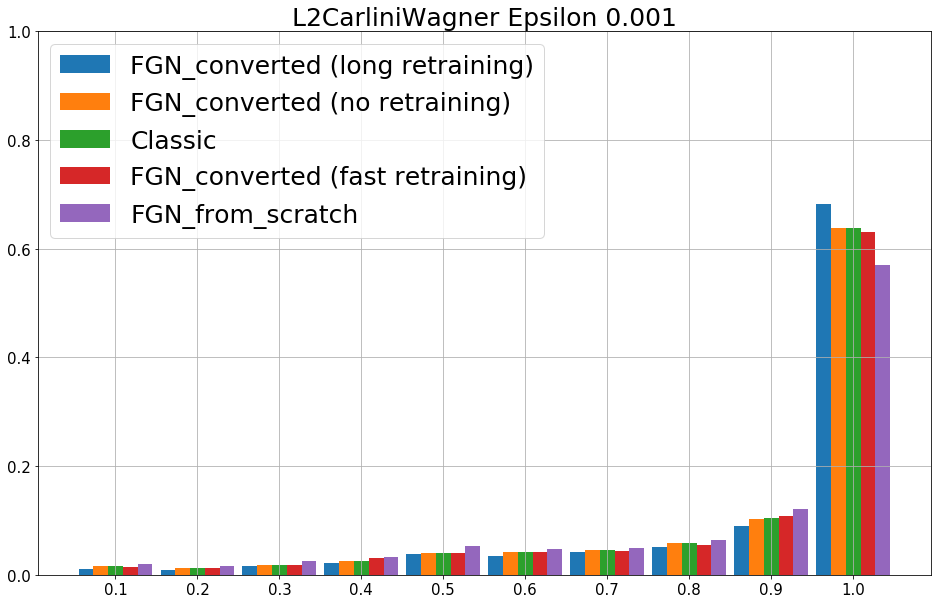

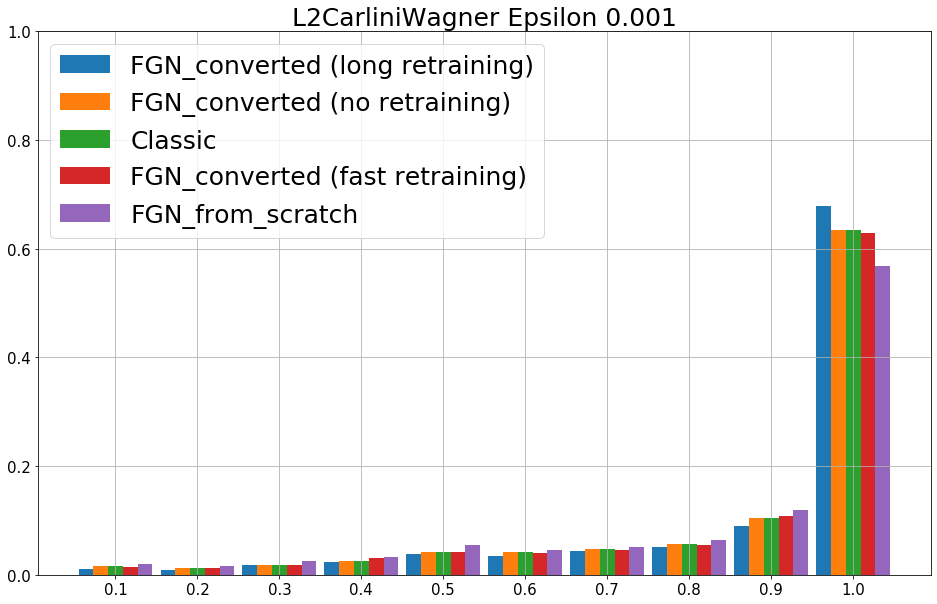

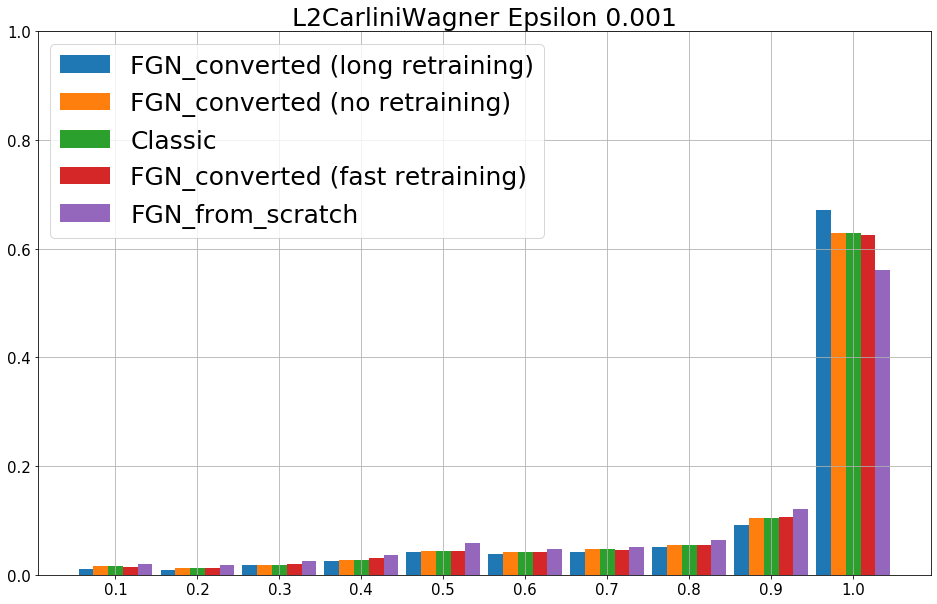

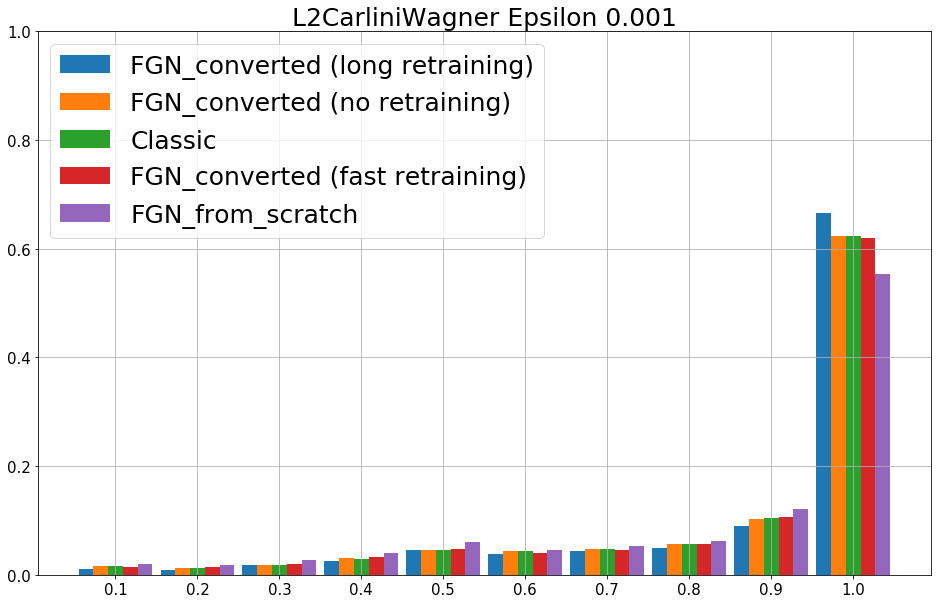

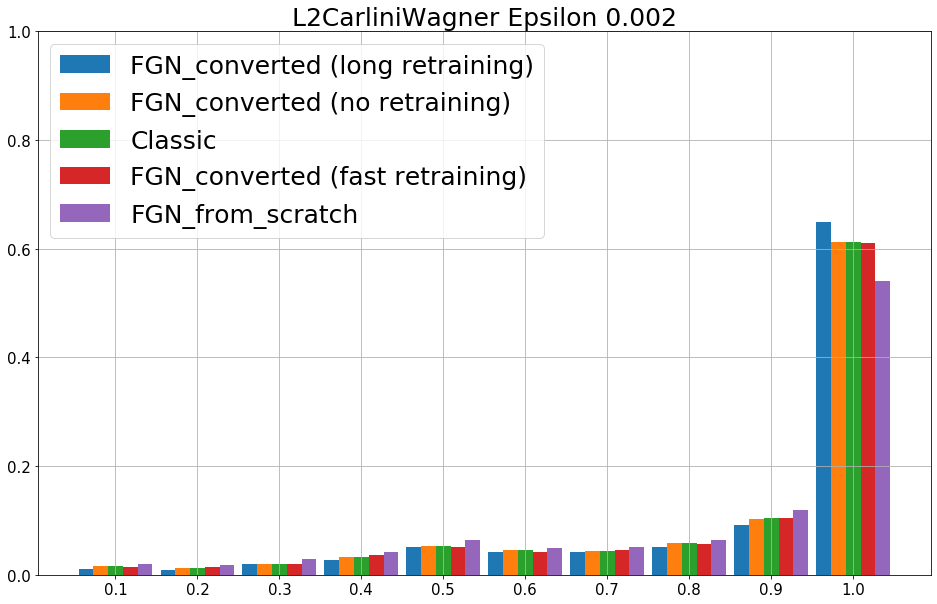

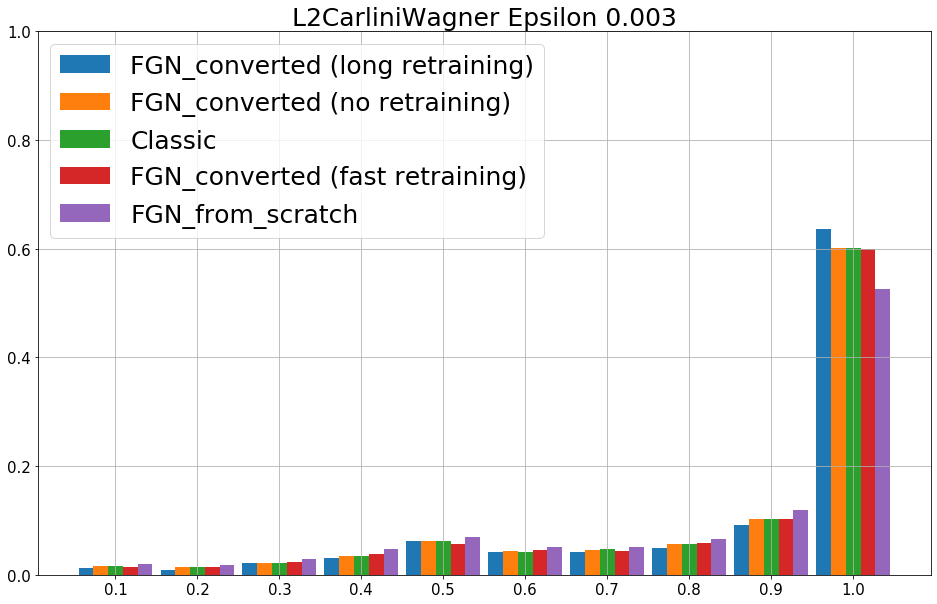

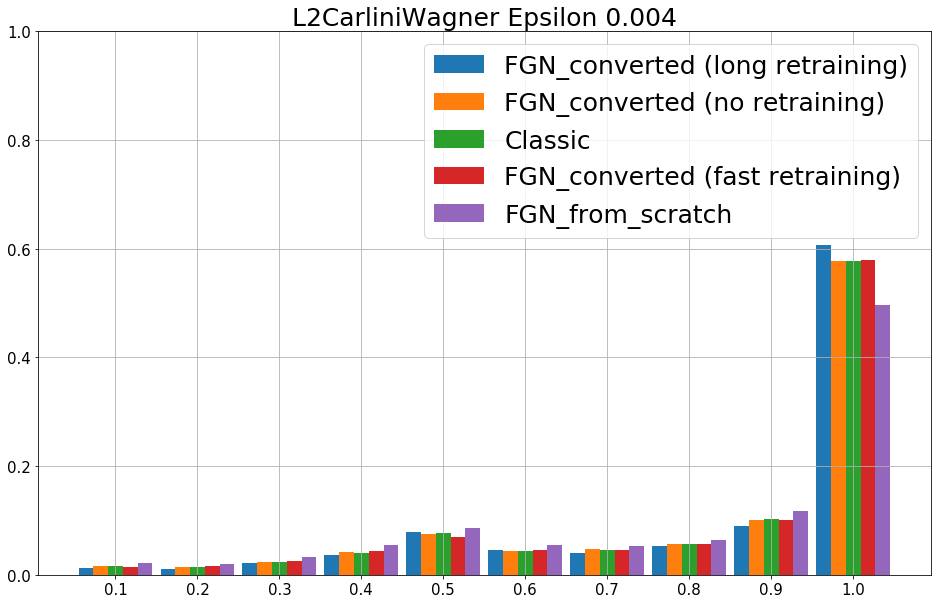

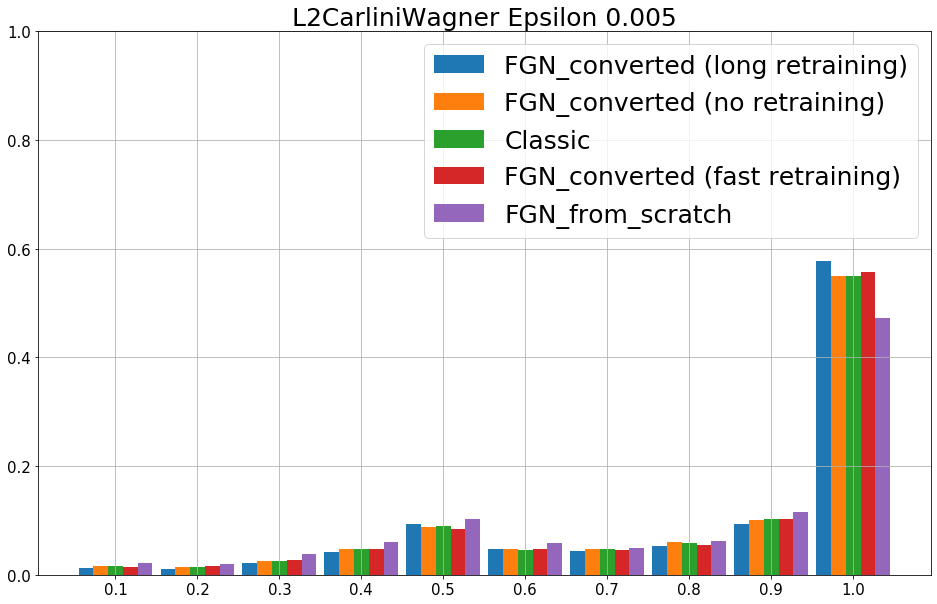

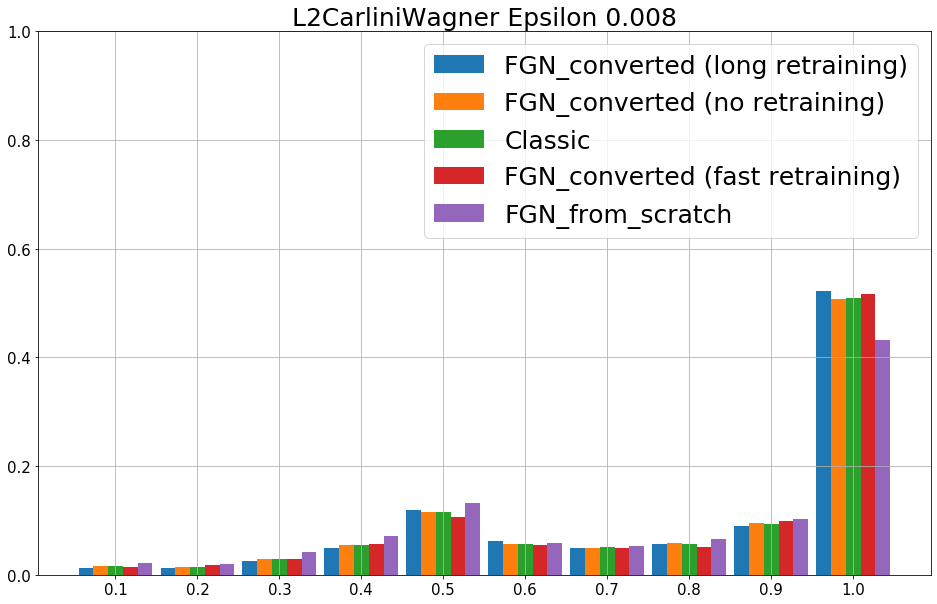

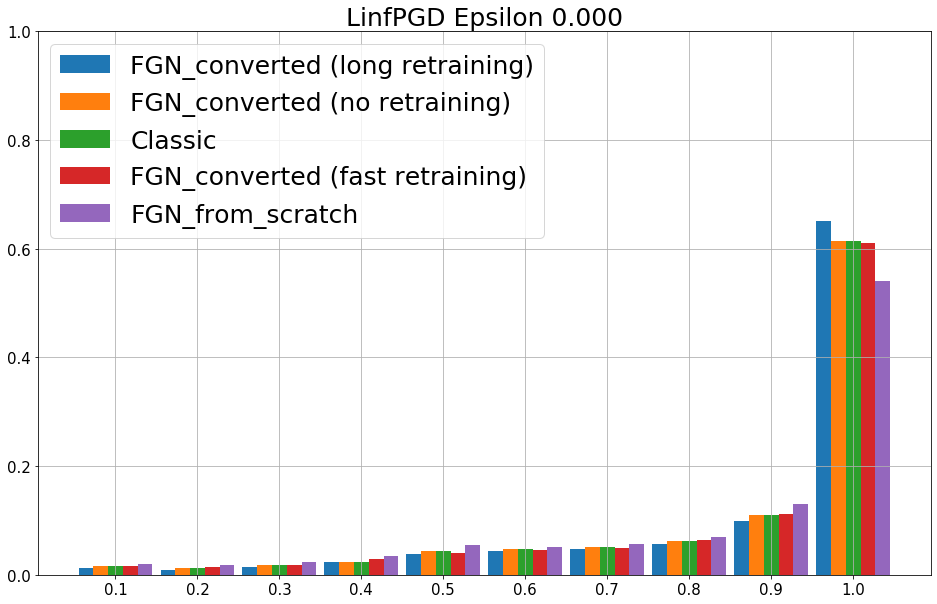

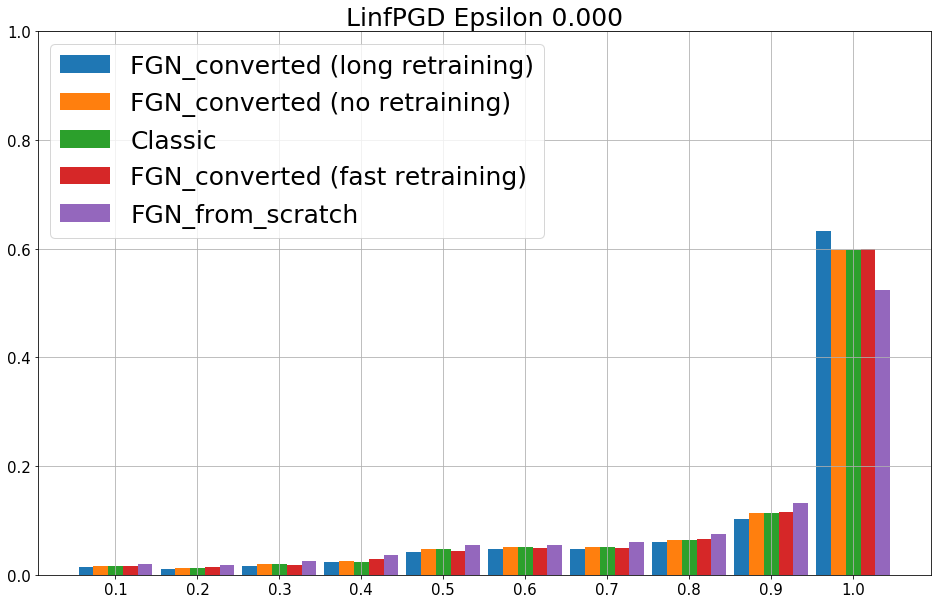

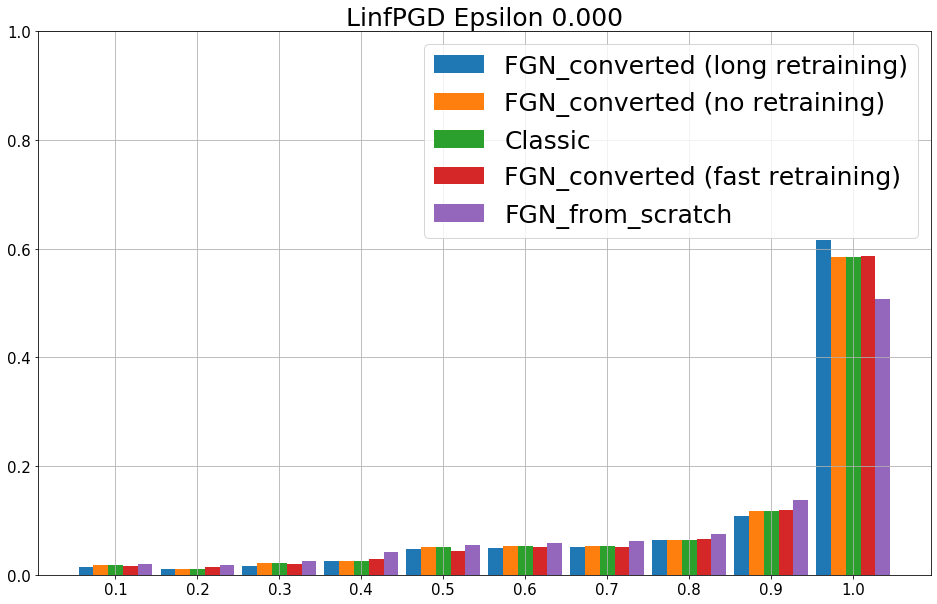

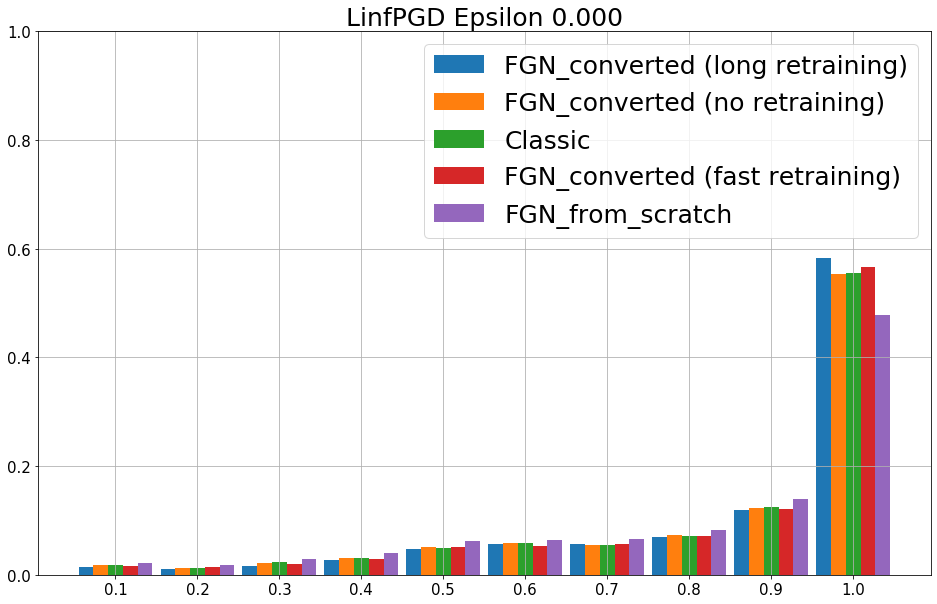

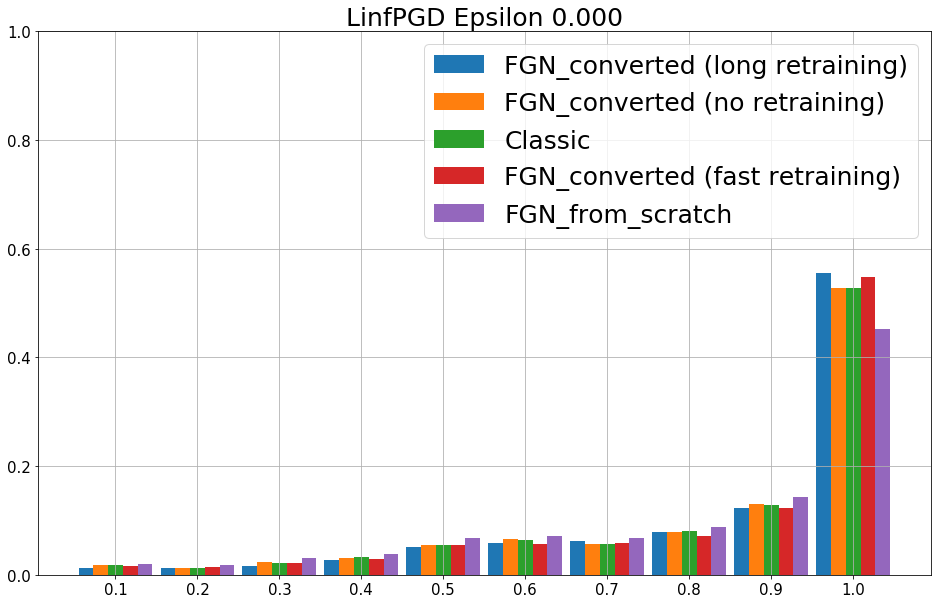

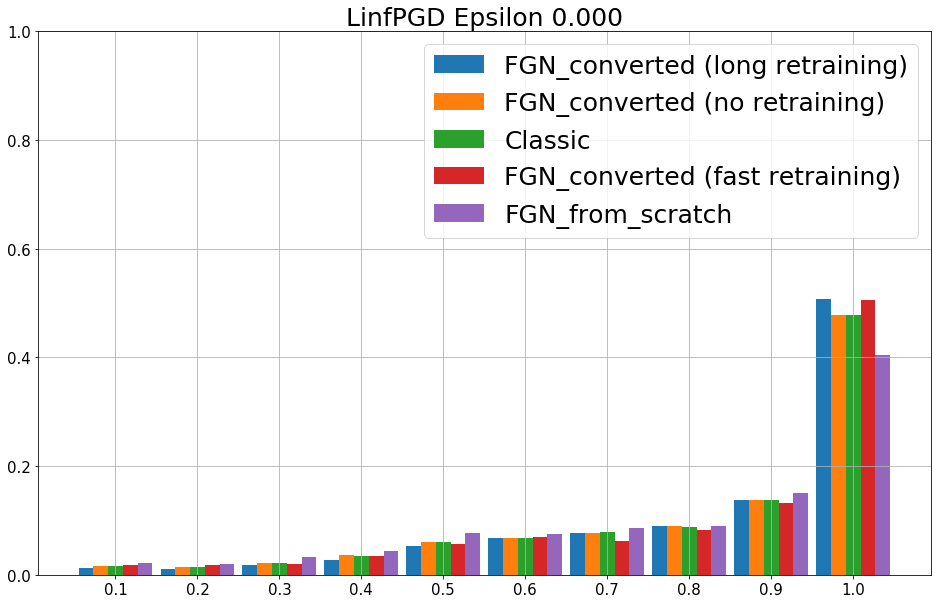

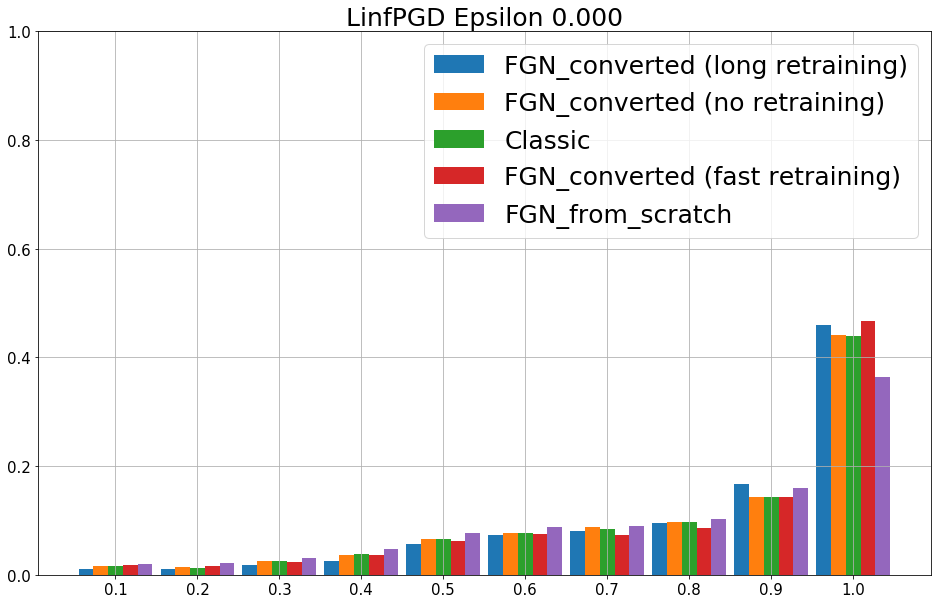

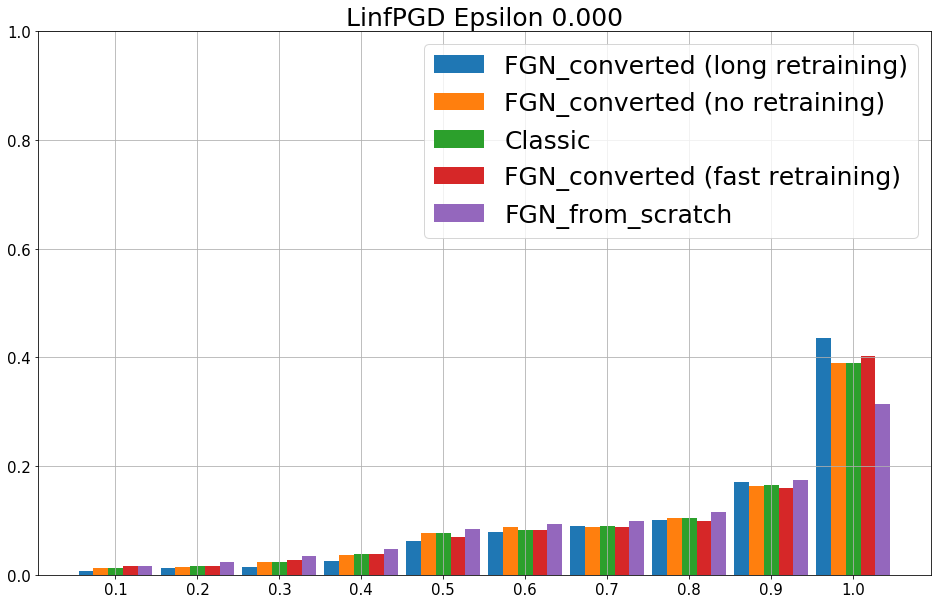

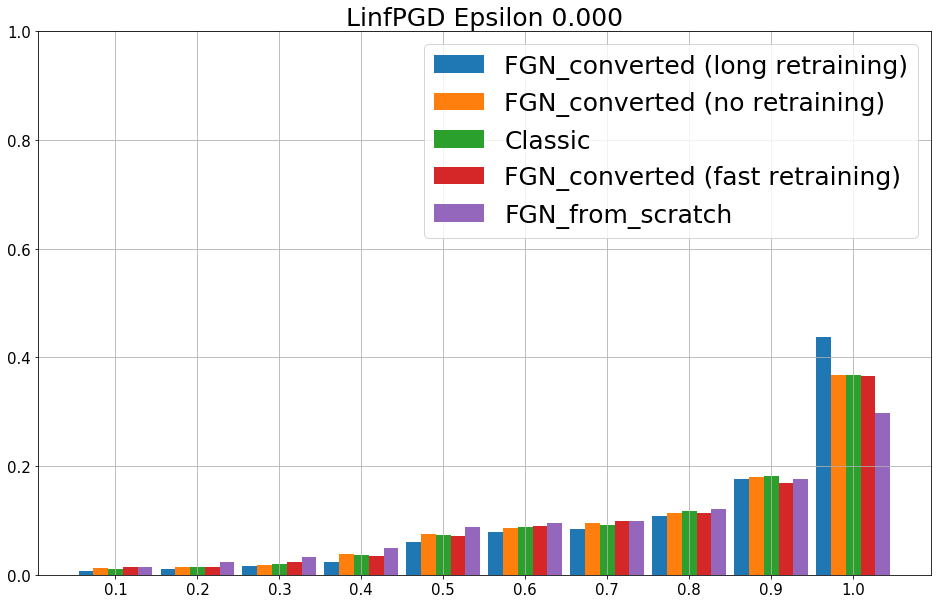

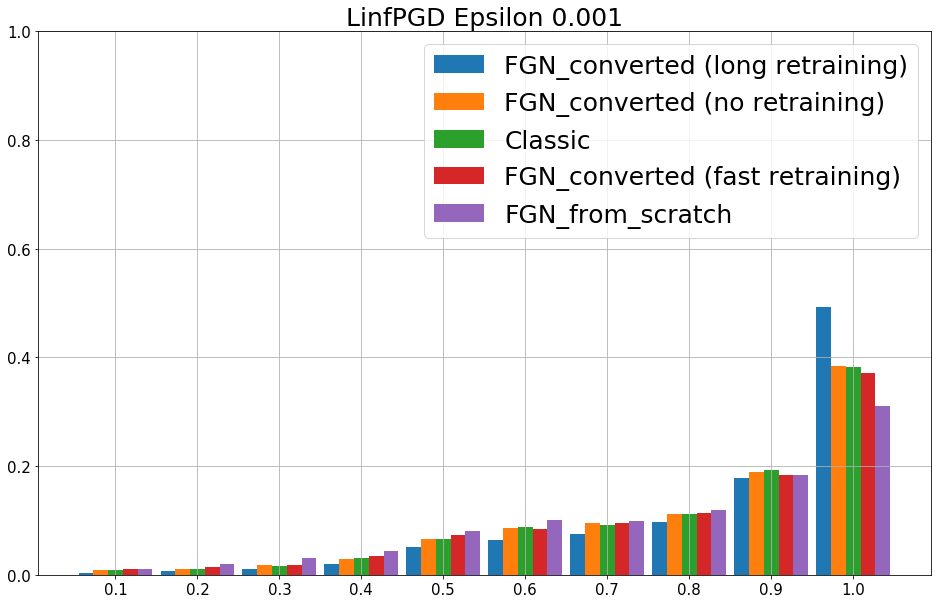

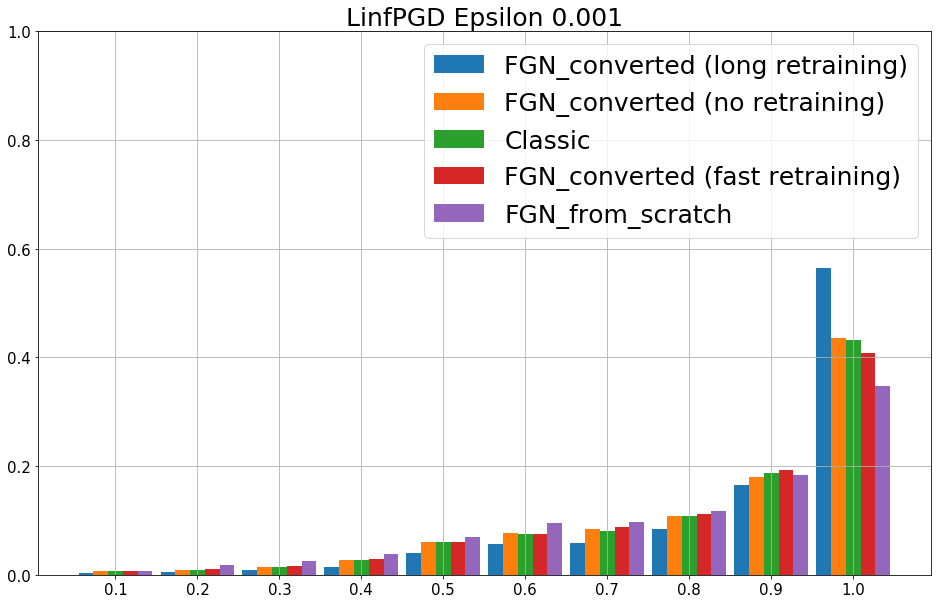

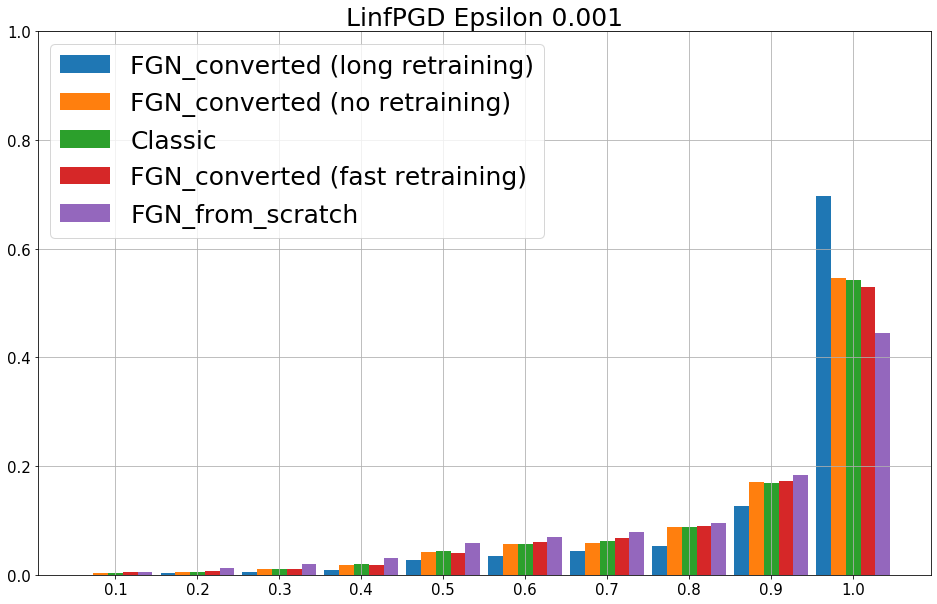

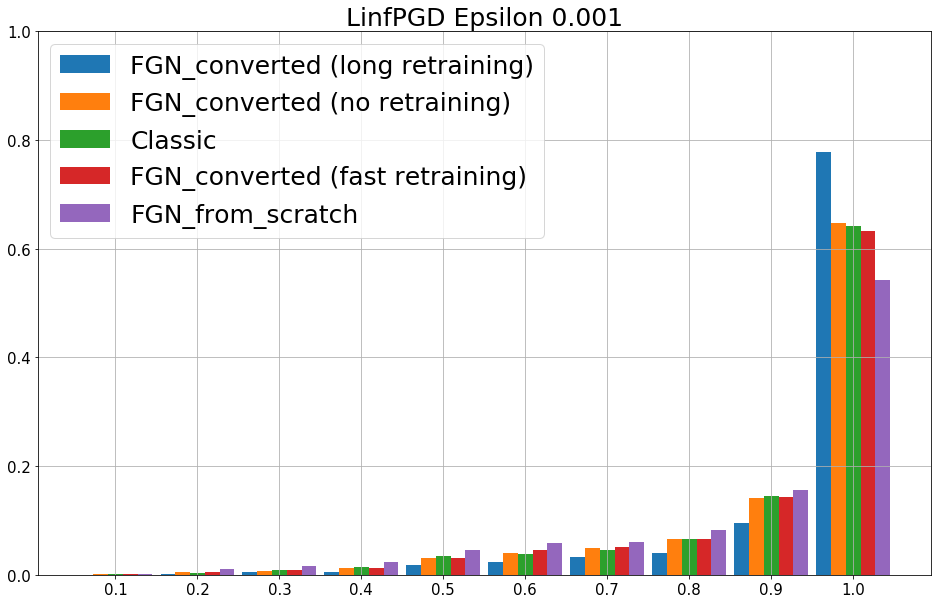

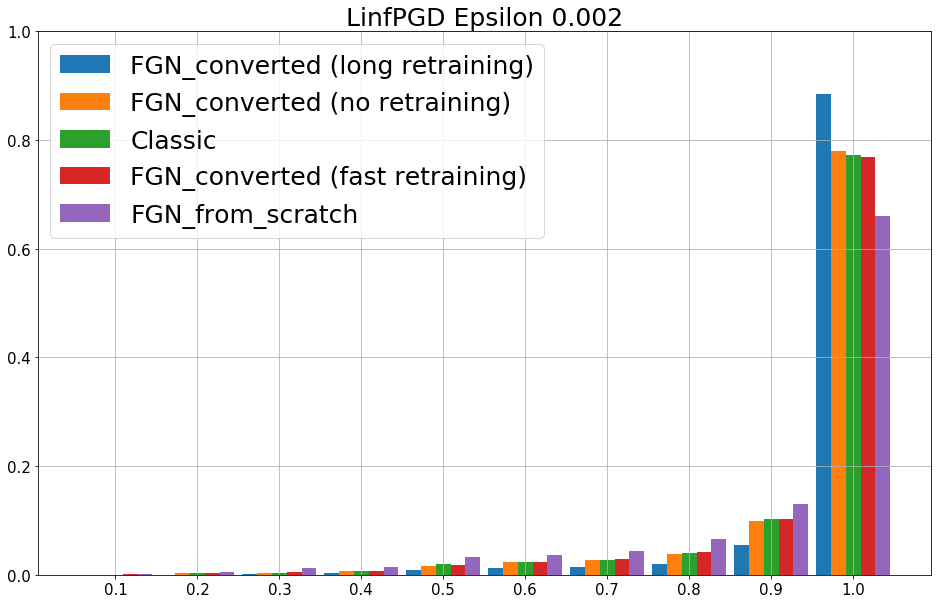

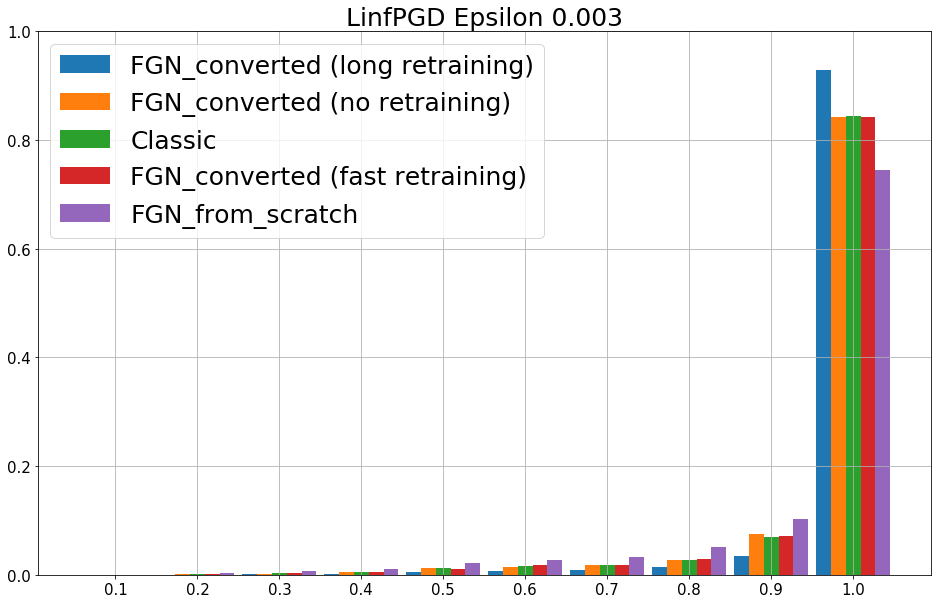

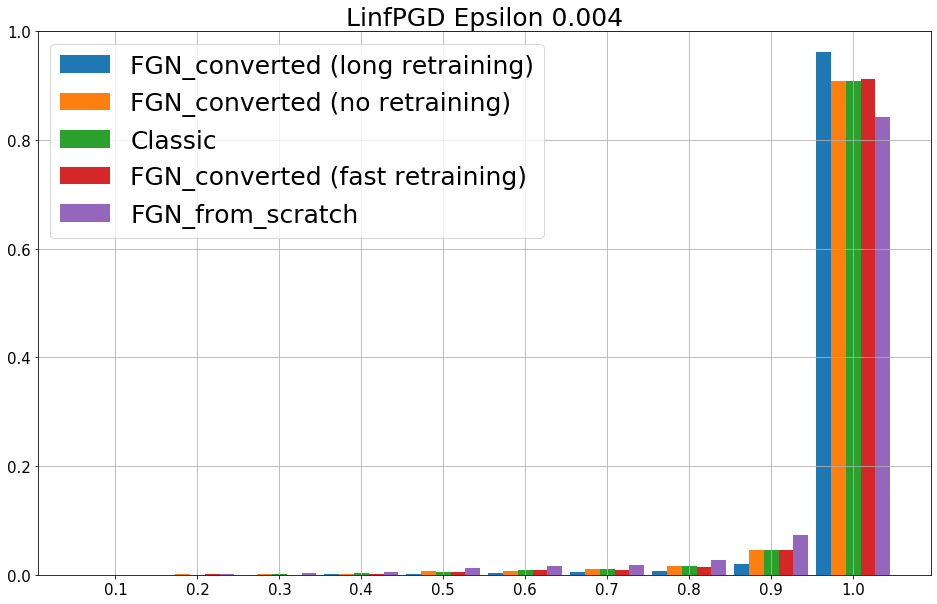

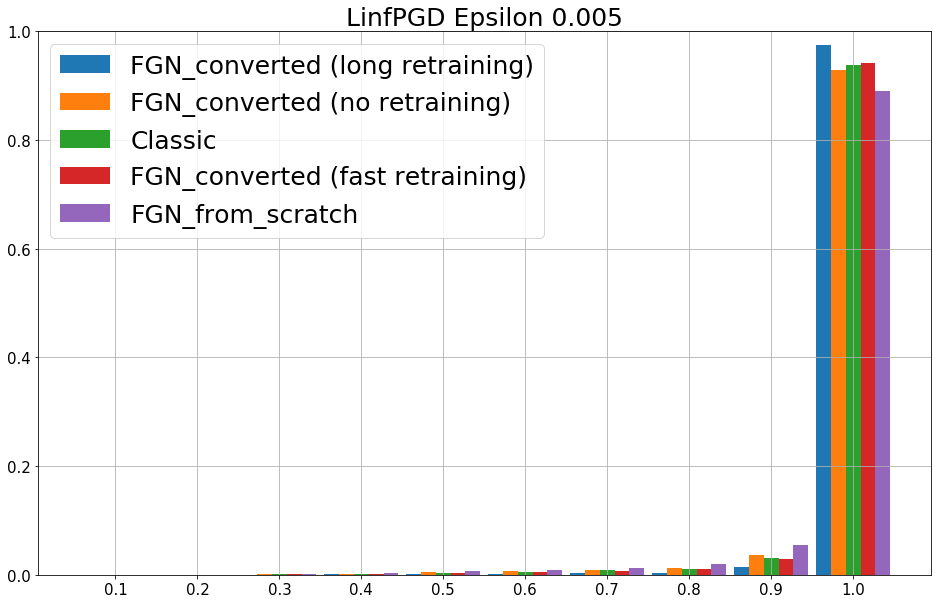

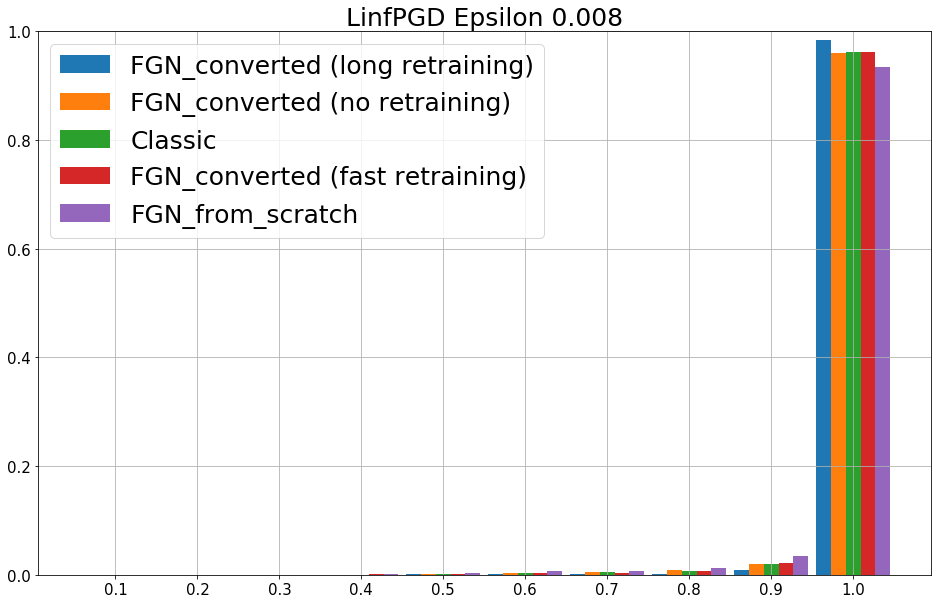

In [75]:
# histogram of conf

for attack_name in attack_names:
    for eps_ind,eps in enumerate(small_epsilons):
        confs = []
        weights = []
        for model_name in model_names:
            confs.append(small_eps_adv_confidences[attack_name][model_name][eps_ind])
            weights.append(np.ones_like(small_eps_adv_confidences[attack_name][model_name][eps_ind])/len(small_eps_adv_confidences[attack_name][model_name][eps_ind]))

        plt.hist(confs,
                 weights = weights,
                 label=model_names,
                 bins= 0.05+ np.arange(11)/10,
                 align='mid',
                 rwidth=0.90
                )

        plt.xticks((np.arange(10)+1)/10.0)
        plt.grid(True)
        plt.legend(fontsize=25)
        plt.title('{} Epsilon {:.3f}'.format(attack_name, eps), fontsize=25)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        plt.ylim(top=1.0)

        plt.show()